# TF-IDF, Bag-of-words

## Что такое корпус текстов?

**Корпус текстов** — это большой набор текстовых данных, который используется для задач обработки естественного языка (NLP). Он может состоять из документов различного типа, включая книги, статьи, посты в социальных сетях, и любые другие текстовые материалы. Корпус текстов используется для обучения моделей машинного обучения, таких как BERT, GPT, и других.

Пример корпуса текстов:
- Новостные статьи: Тексты новостных сайтов или газет.
Пример: Корпус статей New York Times.

- Твиты: Набор сообщений с Twitter.

Пример: Корпус из твитов для анализа настроений.

- Википедия: Огромная база текстов из Википедии, которая часто используется для предобучения моделей.

Пример: Корпус Wikipedia, который использовался для обучения BERT.

- Книги: Собрание художественных или научных книг.

Пример: Google Books Ngram Corpus, который содержит данные о частотах фраз и слов в книгах.

- Официальные документы: Юридические документы, законы, постановления.

 Пример: Корпус юридических документов для анализа законов и юридических прецедентов.

## Как из корпуса выделяется отдельный документ?

Для того чтобы выделить отдельный документ из корпуса текстов, необходимо учитывать структуру корпуса и способ хранения данных. Вот основные подходы:

1. **Явное разделение документов**:
   - **Структурированные данные**: Если корпус представляет собой файл, где документы явно разделены (например, каждая статья хранится в отдельном файле или запись в базе данных), то выделение документа просто сводится к доступу к нужной записи или файлу.
   - Пример: если корпус состоит из набора статей, каждая из которых хранится в формате `.txt`, то каждый такой файл является отдельным документом.

2. **Сегментация внутри единого файла**:
   - **Метаданные**: В некоторых случаях тексты могут быть собраны в одном файле, а границы документов указываются с помощью специальных маркеров, меток или тегов (например, в JSON, XML или текстовом файле с разделителями).
   - Пример:
     ```json
     {
       "documents": [
         {"title": "Документ 1", "text": "Текст первого документа..."},
         {"title": "Документ 2", "text": "Текст второго документа..."}
       ]
     }
     ```
     Здесь можно выделить отдельный документ, обратившись к нужной записи с помощью ключа, например, `documents[0]["text"]`.

3. **По предложениям или абзацам**:
   - Иногда корпус текстов может быть не структурирован как набор отдельных файлов. В таких случаях, чтобы выделить документ, можно использовать естественные языковые единицы, такие как предложения или абзацы.
   - Пример: Если в корпусе статьи или книги хранятся как единый текст, можно разбить его на отдельные документы, ориентируясь на маркеры конца абзацев (например, двойные переводы строки) или специальные заголовки.

4. **Построчный или по строкам данных**:
   - В корпусах, таких как логи, твиты или данные из форумов, каждый документ может быть представлен одной строкой текста. В таких случаях каждый отдельный документ — это одна строка файла.
   - Пример: Каждая строка файла CSV может представлять собой отдельный документ.
     ```
     Tweet1: "Я люблю NLP!"
     Tweet2: "Машинное обучение – это здорово!"
     ```


5. **Выделение документа по ключевым метаданным**:
   - Если корпус содержит метаданные, такие как заголовки, авторы, даты публикаций, можно выделить документы по этим метаданным. Например, в корпусе новостей можно выделить все документы, опубликованные в определенную дату или написанные конкретным автором.

Когда используется:

- **Обучение моделей**: При подготовке данных для обучения NLP-моделей, таких как BERT или GPT, важно разделить корпус на отдельные документы, которые будут использоваться для подачи в модель.
- **Поисковые системы**: При реализации поиска, каждый документ корпуса рассматривается как отдельный элемент для индексации и поиска по ключевым словам.

Таким образом, выделение документа зависит от структуры корпуса и используемого формата данных. Если корпус структурирован, задача сводится к выборке нужной записи или файла; в случае неструктурированных данных, можно ориентироваться на текстовые разделители, такие как абзацы или предложения.

## Расскажи про tf-idf? Как мы получаем эмбеддинги в tf-idf

Эмбеддинги на основе **TF-IDF** (Term Frequency - Inverse Document Frequency) представляют собой числовые векторы, которые отражают важность слов в документе относительно корпуса документов. TF-IDF — это один из методов, который использует статистический подход для вычисления представления слов в тексте.

**Шаги получения эмбеддингов с помощью TF-IDF:**

1. **Выбор корпуса текстов**: Допустим, у нас есть набор документов (корпус). Каждый документ — это набор слов (терминов), и наша цель — получить числовое представление каждого документа.

2. **TF (частотность термина)**:
   - **TF** (Term Frequency) — это частота встречаемости термина в документе. Она рассчитывается по формуле:

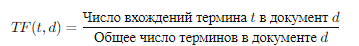

   Таким образом, чем чаще слово встречается в документе, тем выше его TF.

3. **IDF (обратная частотность документа)**:
   - **IDF** (Inverse Document Frequency) измеряет важность термина по всему корпусу. Она уменьшается для слов, которые часто встречаются во многих документах, поскольку такие слова менее информативны.

 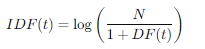

   где \(N\) — это общее количество документов в корпусе, а \(DF(t)\) — количество документов, в которых встречается термин \(t\). Если термин встречается в большинстве документов, его IDF будет низким, и наоборот.

4. **Расчет TF-IDF**:
   После вычисления TF и IDF для каждого термина, их произведение даст взвешенную частоту термина с учетом его редкости:



   Это значение представляет собой вес каждого слова в документе.

5. **Представление документа как вектора**:
   - Каждый документ можно представить в виде вектора, где каждое измерение соответствует определенному термину из словаря (всех уникальных слов корпуса), а значение — это TF-IDF для данного термина. Таким образом, документ с \(n\) уникальными терминами будет представлен вектором размерности \(n\).

6. **Нормализация**: Векторы документов могут быть нормализованы (например, по длине), чтобы учесть разницу в длине текстов и улучшить их сравнение.

Пример:
Допустим, у нас есть два документа:

- Документ 1: "Кот любит молоко"
- Документ 2: "Собака любит мясо"

После токенизации мы получаем следующие слова: ["Кот", "любит", "молоко", "Собака", "мясо"]. Для каждого слова считаем TF-IDF в каждом документе, где редко встречающиеся слова (например, "молоко" и "мясо") получат более высокий вес, чем частое слово "любит".

 Особенности эмбеддингов TF-IDF:
- **Семантика**: TF-IDF эмбеддинги не учитывают контекст слов. Каждое слово имеет фиксированный вес, основанный на его частоте, без учета порядка слов или зависимостей между ними.
- **Ограниченность векторного пространства**: Векторное пространство зависит от числа уникальных слов в корпусе, что может приводить к большой размерности.

 Преимущества TF-IDF:
- Простой и быстрый в реализации.
- Хорошо работает для задач классификации текстов или поиска, где важно выявить ключевые слова.

Недостатки:
- **Не учитывает семантические связи**: Слова, схожие по смыслу, но разные по написанию, будут иметь совершенно разные векторы.
- **Нечувствительность к порядку слов**: Модель не учитывает синтаксические структуры или контексты, что ограничивает её способность к пониманию сложных фраз.

**Заключение:**

TF-IDF предоставляет базовый способ создания эмбеддингов, где учитывается важность слова в конкретном документе относительно всего корпуса. Этот метод часто используется для задач информационного поиска, но современные подходы, такие как Word2Vec, GloVe, и BERT, заменяют его, так как они лучше справляются с захватом контекста и семантических связей между словами.

## Что такое эмбдеддинг применительно к задачам nlp?

**Эмбеддинг** (embedding) — это способ представления слов или фраз в виде числовых векторов фиксированной размерности, который используется в задачах обработки естественного языка (NLP). Эти векторы представляют собой плотные (dense) представления данных, где схожие по смыслу слова имеют близкие векторы в многомерном пространстве. Эмбеддинги позволяют моделям машинного обучения эффективно обрабатывать текст, который в исходной форме является набором слов.

 Как работают эмбеддинги?

Слова представляются в виде числовых векторов, и каждая координата этого вектора представляет скрытую характеристику или признак слова. Модель, обучаясь, находит такие представления, которые помогают учитывать смысловые и синтаксические взаимосвязи между словами. Например, модель может научиться, что слова "король" и "королева" имеют похожие векторы с различием, связанным с полом.

 Основные задачи, решаемые с помощью эмбеддингов:
1. **Семантическое представление слов**: Слова, которые имеют схожее значение или контекст, будут располагаться близко в пространстве эмбеддингов.
2. **Снижение размерности**: Эмбеддинги уменьшают высокоразмерные представления текста (например, one-hot encoding), что облегчает обучение моделей.
3. **Учет контекста**: Современные методы, такие как контекстные эмбеддинги, могут учитывать положение и значение слова в зависимости от контекста в предложении.

 Примеры методов эмбеддингов:
1. **Word2Vec**: Создает статичные эмбеддинги для слов, где каждое слово представлено фиксированным вектором вне зависимости от контекста.
   - **CBOW** (Continuous Bag of Words) и **Skip-gram** — два варианта этой модели.
   
2. **GloVe** (Global Vectors for Word Representation): Статичный метод, который обучает вектора слов на основе их ко-частотности в корпусе текста.

3. **FastText**: Расширяет Word2Vec, добавляя обработку подслов (subword), что позволяет лучше работать с редкими словами или словами с похожими корнями.

4. **Контекстные эмбеддинги** (contextual embeddings):
   - **BERT**: Каждое слово представляется по-разному в зависимости от контекста в предложении. Например, "bank" будет иметь разные представления в контексте "на берегу реки" и "в банке".
   - **GPT, RoBERTa, T5**: Эти модели также генерируют контекстные эмбеддинги, которые учитывают порядок и зависимость слов в предложении.

Статичные vs Контекстные эмбеддинги:
- **Статичные эмбеддинги** (например, Word2Vec, GloVe) дают одно фиксированное представление для каждого слова, независимо от его контекста.
- **Контекстные эмбеддинги** (например, BERT, GPT) создают разные представления для одного и того же слова в зависимости от его окружения в предложении.

 Пример эмбеддингов:
Предположим, у нас есть два слова: "собака" и "кошка". В статичных методах они могут быть представлены следующими векторами:

- Собака: [0.5, -0.3, 0.8, ...]
- Кошка: [0.4, -0.2, 0.9, ...]

Контекстные модели же дадут разное представление одного и того же слова в зависимости от его использования в предложении. Например, "банк" в разных контекстах будет иметь разные вектора.

**Вывод:**

Эмбеддинги являются важной частью современного NLP, поскольку позволяют моделям обрабатывать текстовые данные, представленные в векторной форме. Они облегчают обучение моделей и способствуют улучшению их способности учитывать семантические и синтаксические связи между словами.

## Чем эмбеддинги bert отличается от эмбеддингов tf-idf?

Эмбеддинги, генерируемые моделями **BERT** и методом **TF-IDF**, существенно различаются в своей природе, назначении и способе получения.

1. **TF-IDF эмбеддинги**:
   - **Природа**: Это статистический метод, который использует частотные характеристики слов в документе и по всему корпусу для их представления в виде числовых векторов. 
   - **Как работает**: TF-IDF (Term Frequency-Inverse Document Frequency) измеряет важность слова в контексте конкретного документа и всего корпуса:
     - **TF (Term Frequency)**: Частота появления слова в документе.
     - **IDF (Inverse Document Frequency)**: Обратная частота появления слова во всех документах, которая снижает вес часто встречающихся слов (например, предлогов).
   - **Эмбеддинг**: Каждый документ представляется вектором размерности, равной количеству уникальных слов в корпусе. Вектор каждого слова содержит вес TF-IDF.
   - **Ограничения**:
     - Это **не контекстуальные** эмбеддинги, т.е. одно и то же слово всегда имеет одно и то же представление вне зависимости от его контекста.
     - TF-IDF **не учитывает порядок слов** и не передает синтаксические или семантические зависимости.

   Пример:
   Для корпуса с документами, содержащими слова "машинное обучение", TF-IDF присвоит числовые веса каждому слову в зависимости от его частоты в документе и корпусе.

2. **BERT эмбеддинги**:
   - **Природа**: BERT — это нейронная сеть трансформерного типа, которая обучается на больших объемах данных с целью моделирования контекстных связей между словами.
   - **Как работает**: BERT использует механизм внимания, чтобы учитывать весь контекст предложения при создании эмбеддингов. Это позволяет ему создавать **контекстно-зависимые** представления слов, где одно и то же слово может иметь разное представление в зависимости от контекста (например, слово "банк" в значении финансового учреждения и берег реки).
   - **Эмбеддинг**: Каждое слово представляется вектором фиксированной длины (например, 768 для BERT Base). Эти эмбеддинги учитывают как позицию слова в предложении, так и его контекст.
   - **Преимущества**:
     - BERT понимает контекст слова, синтаксис и семантические зависимости между словами.
     - Эмбеддинги BERT используются для более сложных задач, таких как классификация текста, извлечение сущностей, перевод и т.д.

   Пример:
   В предложениях "банк реки" и "банк кредитов" эмбеддинги для слова "банк" будут различаться, так как BERT учитывает контекст каждого использования.

**Сравнение:**

| Характеристика          | **TF-IDF**                               | **BERT**                                   |
|-------------------------|------------------------------------------|--------------------------------------------|
| **Тип эмбеддингов**      | Неконтекстуальные, базируются на частотах | Контекстуальные, основаны на трансформерах |
| **Размерность векторов** | Зависит от размера словаря               | Фиксированная для каждой модели (например, 768) |
| **Контекст**             | Не учитывает контекст                    | Учитывает полный контекст предложения      |
| **Операции**             | Матричные операции с частотами слов      | Нейросетевая модель                       |
| **Использование порядка слов** | Нет                                   | Да                                         |
| **Применение**           | Простой поиск и классификация текста      | Сложные задачи NLP (вопрос-ответ, NER и т.д.) |

**Когда использовать:**

- **TF-IDF**:
  - Для **простых задач**, например, классификации документов или поиска, когда контекст не важен.
  - Когда необходимо **быстрое вычисление** векторных представлений.
  
- **BERT**:
  - Для **сложных задач**, где контекст имеет значение (анализ тональности, перевод текста, задачи генерации текста).
  - Когда требуется глубокое понимание семантики и синтаксиса языка.

Таким образом, BERT предлагает гораздо более мощное и контекстно-чувствительное представление текста по сравнению с TF-IDF, что делает его более подходящим для современных задач NLP, хотя и с более высокими вычислительными затратами.

## Как отличаются размерности эмбеддинговгов в TF-IDF и BERT?

Размерности эмбеддингов в **TF-IDF** и **BERT** существенно различаются как по подходу к их вычислению, так и по их представлению в пространстве векторов. Вот ключевые различия:

 1. **TF-IDF**:

- **Размерность эмбеддинга**: Вектор TF-IDF имеет размерность, равную количеству уникальных слов в корпусе, что напрямую зависит от размера словаря (vocab size). Чем больше корпус, тем больше размерность вектора.
  - Например, если в корпусе 10,000 уникальных слов, размерность каждого TF-IDF вектора будет 10,000.
  - Размерность TF-IDF зависит от размера корпуса и может сильно варьироваться.

- **Особенности**:
  - Размерность растет с увеличением размера словаря.
  - Один и тот же векторный размер для всех документов.
  - Каждый элемент вектора — это взвешенное значение для конкретного слова в документе.

 2. **BERT**:

- **Размерность эмбеддинга**: Векторное представление каждого токена, полученное BERT, имеет фиксированную размерность, которая зависит от архитектуры модели. Для базовой модели BERT (BERT Base), размерность эмбеддинга — **768**. Для BERT Large — **1024**.
  - Каждый токен (слово или часть слова) представляется вектором фиксированной длины (например, 768).
  - Итоговый эмбеддинг для всего предложения или документа может быть получен путем агрегации векторов для всех токенов, например, усреднением или использованием CLS-токена.

- **Особенности**:
  - Независимо от длины предложения, каждый токен всегда будет иметь фиксированную длину эмбеддинга (например, 768 для BERT Base).
  - BERT использует контекстно-зависимые представления, которые изменяются в зависимости от соседних слов.

Сравнение:

| Характеристика               | **TF-IDF**                                           | **BERT**                                      |
|------------------------------|-----------------------------------------------------|-----------------------------------------------|
| **Размерность эмбеддинга**    | Зависит от количества уникальных слов в корпусе     | Фиксированная: 768 (BERT Base) или 1024 (BERT Large) |
| **Контекстуальность**         | Неконтекстуальные представления                     | Контекстуальные эмбеддинги                    |
| **Зависимость от размера корпуса** | Да                                              | Нет                                           |
| **Способ представления**      | Вектор с весами TF-IDF для каждого слова в документе | Векторное представление для каждого токена, учитывающее контекст |

Итог:
- **TF-IDF** эмбеддинги имеют переменную размерность, зависящую от количества уникальных слов в корпусе, и не учитывают контекст.
- **BERT** эмбеддинги всегда имеют фиксированную размерность (768 или 1024) и учитывают контекст предложения, обеспечивая более точное семантическое представление текста.

Когда размерность важна, использование TF-IDF может быть оправдано для небольших корпусов или простых задач, но для контекстно-чувствительных приложений, таких как понимание семантики текста, **BERT** более предпочтителен.

## Расскажи про bag of words

**Bag of Words (BoW)** — это простой метод представления текстовых данных в виде векторов, который часто используется в задачах обработки естественного языка (NLP).

Основные принципы:

1. **Представление текста**:
   - BoW игнорирует порядок слов и рассматривает документ как "мешок" слов.
   - Каждое слово в тексте рассматривается как элемент вектора.

2. **Создание словаря**:
   - Из всех текстов создается список всех уникальных слов (словарь).
   - Каждый документ представляется вектором, где каждая позиция соответствует какому-то слову из словаря, а значение позиции — это количество появлений слова в документе.

3. **Пример**:
   - Если в корпусе текстов есть три документа:
     1. "кошка сидит на дереве"
     2. "собака сидит под деревом"
     3. "птица сидит на дереве"
   
   Словарь может выглядеть так: ["кошка", "собака", "сидит", "на", "дереве", "под", "деревом", "птица"].
   Вектор для первого документа будет: [1, 0, 1, 1, 1, 0, 0, 0] (1 — слово встречается, 0 — не встречается).

4. **Ограничения**:
   - Не учитывает порядок слов (то есть теряет информацию о структуре предложения).
   - Не учитывает значения слов и контекст (например, синонимы рассматриваются как разные слова).
   
BoW эффективен для простых задач классификации текста или анализа частотности, но более сложные задачи (например, семантический анализ) требуют более продвинутых методов, таких как TF-IDF или трансформерные модели (например, BERT).

## Чем tf-idf лучше, чем bag-of-words?

**TF-IDF** (Term Frequency-Inverse Document Frequency) обладает рядом преимуществ по сравнению с **Bag of Words (BoW)**, особенно когда необходимо учитывать важность слов в контексте всего корпуса документов.

 1. **Взвешивание слов**:
   - **BoW** просто подсчитывает количество появлений слова в документе, что делает этот метод нечувствительным к значимости слов. Часто встречающиеся, но малозначимые слова (например, "и", "в", "на") получают высокий вес, хотя они не несут важной информации.
   - **TF-IDF** устраняет эту проблему, уменьшая вес часто встречающихся слов в корпусе, что позволяет фокусироваться на более информативных и специфичных для документа терминах. Часто встречающиеся слова (такие как "the", "is") получают низкий вес, а редкие, но значимые слова — высокий.

 2. **Контекстное значение**:
   - **BoW** не учитывает, в каких документах слово встречается, а просто использует его частоту. Это приводит к тому, что общие слова получают высокие веса даже в разных контекстах.
   - **TF-IDF** использует компонент **Inverse Document Frequency** (IDF), который снижает вес слов, часто встречающихся в разных документах, и повышает вес редких слов, тем самым лучше отражая значимость слов в контексте определенных документов.

 3. **Фильтрация неинформативных слов**:
   - **BoW** не различает важные и неважные слова, что может негативно сказаться на качестве результатов при использовании метода для задач классификации или кластеризации.
   - **TF-IDF** помогает фильтровать неинформативные слова (например, стоп-слова) за счет их низкого IDF веса, что улучшает качество текстовых представлений.

**Пример**:
Допустим, есть два документа:
1. "Кошка сидит на дереве."
2. "Собака сидит под деревом."

- В **BoW** каждый документ будет представлен вектором на основе частот слов. Оба слова "сидит" и "дерево" будут иметь одинаковое значение, хотя они часто встречаются.
- В **TF-IDF**, слова "сидит" и "дерево" могут иметь более низкие веса из-за их частого появления, а более редкие слова, такие как "кошка" или "собака", получат более высокий вес, так как они уникальны для документов.

 4. **Устойчивость к шуму**:
   - **BoW** может быть подвержен шуму, особенно если в корпусе много часто встречающихся слов.
   - **TF-IDF** уменьшает влияние таких слов, что делает модель более устойчивой к шуму и улучшает производительность в задачах, таких как классификация или кластеризация.

 Итог:
- **TF-IDF** лучше подходит для задач, где важно учитывать значимость слов в контексте корпуса, тогда как **BoW** просто подсчитывает частоту и не оценивает важность слов.


---

# RNN

## Как работает RNN?

Рекуррентная нейронная сеть (RNN, **Recurrent Neural Network**) — это тип нейронной сети, который используется для обработки последовательных данных, таких как временные ряды, текст, аудио или видео. Основное отличие RNN от обычных нейронных сетей заключается в том, что RNN имеет рекуррентные связи, которые позволяют ей учитывать информацию из предыдущих шагов в последовательности. Это делает RNN подходящей для задач, где важен контекст и зависимость данных во времени.

Как работает RNN:

1. **Входные данные**: На каждом временном шаге сеть получает входные данные. Например, если это текст, то на каждом шаге RNN может получать одно слово или символ.

2. **Рекуррентные связи**: В RNN на каждом шаге вычисляется новое скрытое состояние (hidden state), которое зависит как от текущего входного значения, так и от скрытого состояния на предыдущем шаге. Это ключевая особенность RNN — сохранение информации о предыдущих шагах, что позволяет учитывать контекст.

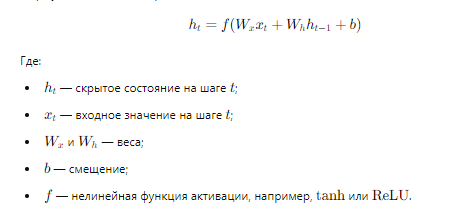

3. **Выходные данные**: После обработки каждого входного шага сеть может выдавать выходное значение. Это может быть либо предсказание для каждого шага, либо итоговое предсказание по всему набору данных.

4. **Затухание или взрыв градиентов**: Один из главных недостатков базовых RNN заключается в том, что при обучении методом обратного распространения ошибки через время (BPTT — Backpropagation Through Time) градиенты могут затухать (vanishing gradients) или "взрываться" (exploding gradients). Это делает обучение долгих последовательностей сложным, так как сеть теряет важную информацию из-за малых градиентов.


RNN отлично подходит для задач, где важно учитывать последовательность или зависимость данных от времени, но их базовые версии имеют свои ограничения, что привело к созданию более сложных архитектур, таких как LSTM и GRU.

## Почему в RNN градиенты затухают?

Затухание градиентов в рекуррентных нейронных сетях (RNN) связано с тем, как работает метод обратного распространения ошибки через время (BPTT — Backpropagation Through Time). Проблема возникает при обучении сети на длинных последовательностях, когда вклад информации от предыдущих шагов постепенно уменьшается и становится слишком мал, чтобы повлиять на обновление весов. 

Основные причины затухания градиентов:

1. **Многократное умножение матриц**: В RNN на каждом шаге используется рекуррентная формула для обновления скрытого состояния:

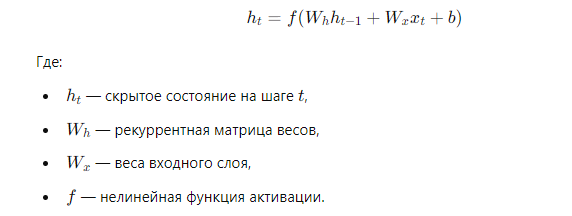

Когда мы выполняем обратное распространение ошибки через сеть, мы должны вычислять градиенты для каждого временного шага, начиная с текущего и возвращаясь к первому шагу. Это приводит к последовательному умножению весов 𝑊ℎ , которые передаются через множество шагов. Если эти веса слишком малы или их значения меньше единицы, многократное умножение приводит к экспоненциальному уменьшению величины градиента.

Для шага t градиент ошибки по отношению к весам можно представить как произведение частных производных от шага t к шагу 

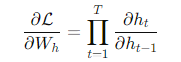

Если значения производных близки к нулю, то их произведение быстро уменьшается при увеличении длины последовательности, и это приводит к затуханию градиентов.

2. **Экспоненциальное уменьшение градиентов:** В случае, если нормы весов Wh  меньше единицы, при многократном умножении весов на себя значения градиентов уменьшаются экспоненциально. Это делает градиенты слишком маленькими на начальных шагах последовательности, что приводит к тому, что сеть не может эффективно обучаться на данных, которые поступают на ранних шагах временной последовательности.

Например, если 𝑊ℎ = 0.5 n раз, градиенты будут затухать экспоненциально, как 0.5^n, и быстро станут близкими к нулю.

3. **Длинные зависимости:** Когда последовательность слишком длинная, информация о более ранних шагах "забывается". При каждом шаге RNN сеть передает только краткую сводку (скрытое состояние) на следующий шаг, и эта сводка может не сохранять всю важную информацию. Затухание градиентов делает невозможным правильную настройку весов для данных из начала последовательности, так как вклад этих шагов в градиент становится слишком мал.


## Какие есть модификации RNN?

**LSTM** — одна из самых популярных и широко используемых модификаций RNN. Она была разработана для решения проблемы затухающих градиентов, что позволяет лучше запоминать информацию на длительных временных интервалах.

**Основные компоненты LSTM:**
- Ячейка памяти: Хранит информацию в течение длительного времени.
- Входной заслон (input gate): Определяет, какое новое значение должно быть записано в ячейку памяти.
- Выходной заслон (output gate): Определяет, какая часть информации из ячейки памяти будет использована для выхода.
- Заслонка забывания (forget gate): Решает, какая информация из ячейки памяти будет забыта.

Эти механизмы позволяют LSTM сохранять и обновлять информацию на нескольких временных интервалах, что делает её устойчивой к затуханию градиентов.

Формулы для LSTM:
Заслонки управляются сигмоидной функцией, а обновление состояния происходит через гейтированную связь.

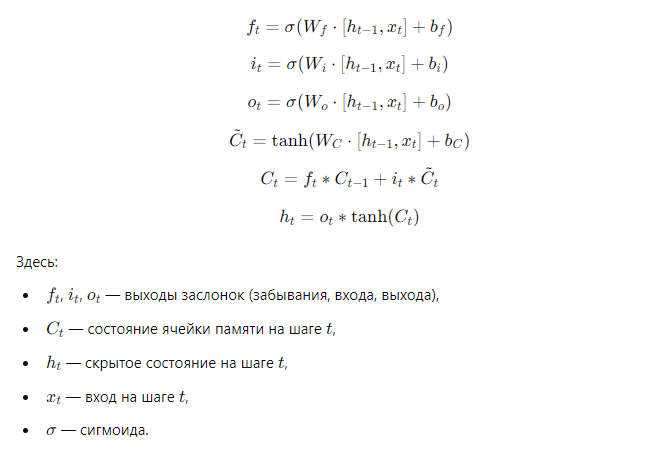


**GRU (Gated Recurrent Unit)**

**GRU** — это упрощенная версия LSTM, которая имеет меньше параметров и зачастую обучается быстрее, сохраняя при этом способность сохранять долговременные зависимости. В GRU нет отдельной ячейки памяти, и объединяются заслонки для обновления и забывания информации.

Основные компоненты GRU:
- Заслонка обновления (update gate): Определяет, сколько новой информации сохранить.
- Заслонка сброса (reset gate): Контролирует, сколько информации из предыдущих шагов забыть.

Формулы для GRU:

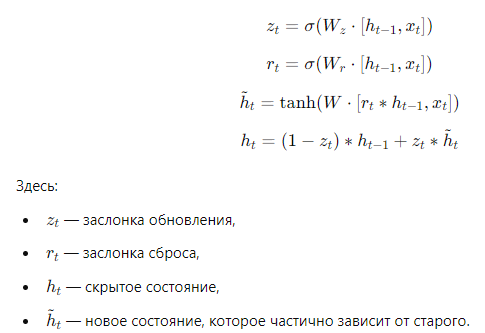

## Как lstm и gru борются с затуханием градиентов?

Механизм, предотвращающий затухание градиентов:
Главное отличие LSTM — это использование состояния ячейки, которое может сохранять информацию почти неизменной в течение многих шагов. В результате градиенты не убывают экспоненциально, как это происходит в обычных RNN, поскольку функция активации скрытого состояния не применяется непосредственно к состоянию ячейки, что предотвращает сильное затухание производных.

В GRU, как и в LSTM, заслонка обновления позволяет сохранять важные зависимости на длительных временных интервалах. Вместо того, чтобы обновлять скрытое состояние каждый раз целиком, заслонка обновления регулирует, насколько обновляются веса. Это делает возможным сохранение информации через большое количество временных шагов без значительного затухания градиентов.
---

# Автоэнкодер

## Что такое автоэнкодер? Как работает данная архитектура?

Автоэнкодер — это нейросетевая архитектура, предназначенная для обучения сжатых (или латентных) представлений данных в виде кода с минимальной потерей информации. Его основная задача — сжать входные данные в более компактное представление (код) и затем восстановить оригинальные данные из этого кода.

**Архитектура автоэнкодера**

Автоэнкодер состоит из двух основных частей:
1. **Энкодер (Encoder)** — это часть, которая сжимает входные данные до латентного представления.
2. **Декодер (Decoder)** — это часть, которая восстанавливает оригинальные данные из латентного представления.

**Детали архитектуры:**

1. **Входной слой**:
   Входные данные X подаются в сеть. Это могут быть любые данные: изображения, тексты, сигналы и т.д.

2. **Энкодер**:
   Энкодер — это набор слоёв нейросети, которые постепенно уменьшают размерность входных данных. 
   - Обычно используется несколько слоёв полносвязных или свёрточных нейронов (в случае работы с изображениями), которые сжимают информацию до более компактного латентного вектора z.
   - Процесс можно описать как    — это функция, определяемая параметрами (весами) сети, которая кодирует данные.

3. **Латентное пространство**:
   В этом слое данные представлены в компактной форме — это сжатое представление данных, называемое кодом. Размерность этого представления меньше, чем у исходных данных. Этот код содержит наиболее важную информацию, необходимую для восстановления данных.

4. **Декодер**:
   Декодер — это набор слоёв нейросети, которые постепенно увеличивают размерность сжатого представления \( z \) до исходного размера данных.
   - Декодер пытается восстановить оригинальные данные из латентного вектора \( z \).
   - Процесс восстановления можно описать как , где g — это функция декодера, которая преобразует код обратно в исходные данные.

5. **Выходной слой**:
   Выход X` — это реконструкция исходных данных X. Цель сети — минимизировать разницу между оригиналом X и его восстановленной версией 
   (X`). 

**Обучение автоэнкодера**

Автоэнкодер обучается путём минимизации ошибки реконструкции между входными данными и восстановленными данными. Обычно это делается с использованием функции потерь, такой как среднеквадратичная ошибка (MSE):

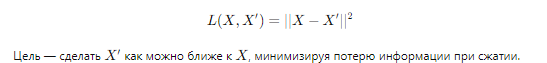

**Пример работы автоэнкодера:**
1. **Сжатие данных**: Входные данные X (например, изображение) проходят через энкодер, который сжимает их в код (например, вектор меньшей размерности).
2. **Восстановление данных**: Этот код передаётся через декодер, который пытается восстановить исходное изображение.
3. **Обучение**: Если восстановленное изображение X` сильно отличается от оригинального, то веса в сети обновляются так, чтобы улучшить качество восстановления на следующих итерациях.

**Типы автоэнкодеров**

1. **Классический автоэнкодер** — обучает сжатое представление данных без явных ограничений на латентное пространство.
2. **Шумоподавляющий автоэнкодер (Denoising Autoencoder)** — обучается на данных с шумом, при этом декодер должен восстанавливать оригинальные данные без шума.
3. **Вариационный автоэнкодер (Variational Autoencoder, VAE)** — латентное пространство в VAE моделируется распределением, и его цель — не только сжать данные, но и обучить вероятностное представление этого сжатого пространства. Это позволяет генерировать новые данные путем семплирования из латентного распределения.
4. **Спарс-автоэнкодер (Sparse Autoencoder)** — в латентном векторе большинство значений принудительно обнуляются (вводится регуляризация на разреженность), что помогает выявить важные признаки данных.

**Применение автоэнкодеров**

- **Сжатие данных**: Автоэнкодеры могут использоваться для сжатия данных без сильной потери качества.
- **Уменьшение размерности**: Можно использовать автоэнкодеры для уменьшения размерности данных, аналогично методу главных компонент (PCA), но в нелинейной форме.
- **Шумоподавление**: Автоэнкодеры могут обучаться на шумных данных и восстанавливать оригинальные данные, что полезно для фильтрации шума.
- **Генерация новых данных**: Вариационные автоэнкодеры могут создавать новые примеры данных, подобные исходным, что делает их полезными для задач генерации изображений и текстов.

Автоэнкодеры — это мощный инструмент для обучения сжатых представлений данных и их последующего восстановления, который находит применение в задачах сжатия, генерации и реконструкции данных.

## Расскажи как использовать автоэнкодер для решения задачи выявления аномалий во временном ряду?

Автоэнкодеры можно эффективно использовать для выявления аномалий во временных рядах, поскольку они обучаются восстанавливать нормальные данные, но могут плохо восстанавливать аномальные. Принцип работы основан на том, что автоэнкодер будет пытаться сжать и восстановить временной ряд, обучаясь на нормальных данных. Если данные содержат аномалию, автоэнкодер, как правило, не сможет качественно её восстановить, что даст высокий уровень ошибки восстановления, что и является признаком аномалии.

# Transformers

## Расскажи архитектуру Transformerner и как он работает?

Архитектура **Transformer** — это революционная модель, которая эффективно использует механизм внимания для обработки последовательных данных, таких как текст, без необходимости в рекуррентных или сверточных слоях, как это было в RNN и CNN. Transformer стал основой многих современных NLP-моделей, таких как BERT, GPT, T5 и других.

Общая структура Transformer

Архитектура Transformer состоит из двух ключевых компонентов:
1. **Энкодер** (Encoder)
2. **Декодер** (Decoder)

Оба компонента состоят из набора одинаковых слоев, каждый из которых включает в себя:
- Механизм **многоголового внимания** (Multi-Head Attention)
- **Нормализацию** и **добавочные связи** (Residual connections)
- **Полносвязные слои** (Feed-Forward Networks)

1. **Энкодер**
Энкодер предназначен для обработки входной последовательности и создания высокоуровневых представлений (эмбеддингов), которые далее передаются декодеру.

Энкодер состоит из:
- **N одинаковых слоев** (в оригинальной статье Transformer использовалось 6 слоев энкодера).
- Каждый слой энкодера включает два ключевых блока:
  - **Многоголовое внимание с механизмом самовнимания (Self-Attention)**: Механизм внимания, который позволяет каждому токену в последовательности обращать внимание на другие токены (включая сам себя).
  - **Полносвязная сеть (Feed-Forward Network, FFN)**: Это простой многослойный перцептрон, который используется для более сложных нелинейных преобразований эмбеддингов.

2. **Декодер**
Декодер обрабатывает последовательность и генерирует выходные данные (например, слова в задаче машинного перевода). Он тоже состоит из нескольких одинаковых слоев (в оригинальной статье 6 слоев).

Структура декодера схожа с энкодером, но содержит дополнительные элементы:
- **Masked Self-Attention**: Специальный механизм внимания, который не позволяет токенам в декодере обращать внимание на будущие токены (это важно для генерации последовательностей).
- **Механизм внимания на выходы энкодера**: Каждый слой декодера также включает механизм внимания, который позволяет ему обращаться к выходам энкодера (это позволяет декодеру учитывать информацию о входной последовательности).

**Шаги работы Transformer**

Теперь давайте разберем шаги, по которым работает модель Transformer:

**Шаг 1: Ввод данных и эмбеддинги**
Перед обработкой, входные данные (например, текст) должны быть преобразованы в числовые представления:
- **Токенизация**: Входные последовательности (слова, символы) разбиваются на токены.
- **Эмбеддинги**: Для каждого токена генерируется эмбеддинг — вектор фиксированной размерности. Это может быть реализовано с помощью Embedding слоя.

Кроме того, Transformer использует **позиционные эмбеддинги**, чтобы модель могла понимать порядок токенов в последовательности, так как сам механизм внимания не учитывает позицию токенов. Позиционные эмбеддинги добавляются к токен-эмбеддингам на этапе ввода.

**Шаг 2: Механизм self-attention (самовнимание)**
Это ключевая часть работы Transformer, которая позволяет токенам взаимодействовать друг с другом. В каждом слое энкодера для каждого токена вычисляются три вектора:
- **Query**: Запрос, который определяет, на что токен хочет обратить внимание.
- **Key**: Ключ, который используется для поиска релевантных токенов.
- **Value**: Значение, которое содержит информацию токена.

!!!Для каждого токена его вектор **query** сравнивается со всеми **key** других токенов, чтобы вычислить вес каждого взаимодействия!!! Это делается с помощью скалярного произведения  Q * K^T , затем результаты нормируются с помощью softmax. Полученные веса применяются к векторам **value** токенов, чтобы получить новое представление токена, которое учитывает информацию от других токенов.!!!

Формула для self-attention:

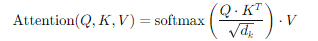


**Шаг 3: Многоголовое внимание (Multi-Head Attention)**
Для улучшения способности модели захватывать разные типы отношений между токенами, механизм внимания разбивается на несколько "голов". Каждая голова выполняет отдельное внимание с разными весами, а затем результаты объединяются и пропускаются через линейное преобразование.

Формула многоголового внимания:

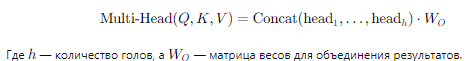

**Шаг 4: Полносвязные слои (Feed-Forward Network)**
После механизма внимания каждый токен пропускается через FFN, который применяет два линейных преобразования с функцией активации (ReLU):



**Шаг 5: Нормализация и добавочные связи (Residual connections)**
Для улучшения обучения в Transformer используются **добавочные связи** и **нормализация по слоям** (Layer Normalization). Это помогает избежать проблемы исчезающих градиентов и ускоряет обучение. Добавочные связи добавляют исходный вход обратно к выходу каждого блока:

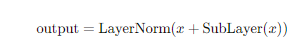

**Шаг 6: Декодер и генерация последовательности**
Декодер получает выход энкодера и предыдущие предсказанные токены, чтобы генерировать следующие элементы последовательности:
- Декодер использует **Masked Self-Attention** (маскирование будущих токенов).
- Внимание декодера к выходам энкодера позволяет учитывать информацию о входной последовательности.
- Итоговое предсказание делается с помощью линейного слоя и softmax для генерации вероятностей следующего токена.

**Итог: Преимущества Transformer**
1. **Параллелизация**: В отличие от рекуррентных моделей (RNN/LSTM), Transformer позволяет обрабатывать всю последовательность сразу, что значительно ускоряет обучение.
2. **Универсальность**: Transformer легко масштабируется и используется как для задач кодирования (например, BERT), так и для генерации (GPT).
3. **Многоголовое внимание**: Это позволяет модели захватывать более сложные и разнообразные зависимости между токенами.

Таким образом, Transformer — это мощная модель для последовательных данных, которая благодаря механизму внимания и многоголовому вниманию эффективно захватывает глобальные зависимости в последовательности и может обучаться параллельно.

## Расскажи как устроен Attention (Механизм внимания)?

**Attention (механизм внимания)** — это ключевая часть многих современных моделей машинного обучения, таких как трансформеры, и используется для определения того, какие части входных данных наиболее важны для предсказания. Внимание позволяет модели сосредоточиться на разных частях входных данных в зависимости от контекста.

**Как вычисляется Attention?**
В основе внимания лежит идея, что каждое входное слово (или элемент данных) влияет на выходное предсказание с различной степенью важности. Эта важность определяется через специальные веса, которые рассчитываются с помощью скалярных произведений между вопросами (query), ключами (key) и значениями (value).

**Шаги вычисления self-attention**
Для одного шага механизма self-attention, когда у нас есть несколько токенов входной последовательности (например, слова), каждый из которых представлен вектором:

1. Получение запросов (Q), ключей (K) и значений (V):

Для каждого токена входной последовательности формируются три вектора: query (запрос), key (ключ) и value (значение). Эти векторы вычисляются через линейные преобразования, где используются обучаемые веса:


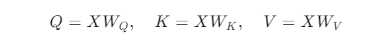\
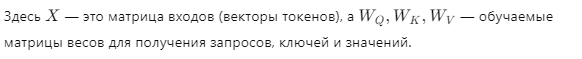

2. Вычисление весов внимания (Attention Weights):

- Для определения важности каждого токена относительно других, вычисляется внимание как скалярное произведение между векторами query и key:

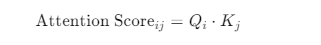

Это даёт оценку того, насколько токен j важен для токена i. Однако такие оценки могут быть слишком большими или малыми, поэтому их необходимо нормализовать.

3. Масштабирование и применение softmax:

- Для масштабирования оценок используют деление на sqrt(dk), где  dk
​
  — размерность ключей. Это нужно для предотвращения слишком больших значений, которые могут быть вредны для градиентных вычислений:

  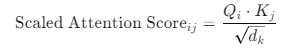

Затем эти значения пропускают через softmax, чтобы получить вероятностное распределение, которое суммируется в 1. Это даёт веса внимания для каждого токена относительно других:
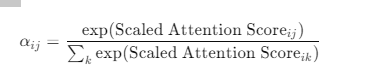

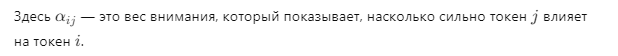

4. Вычисление итогового внимания:

- Итоговое значение внимания для каждого токена получается как взвешенная сумма значений value (V) для всех токенов с учётом весов внимания:
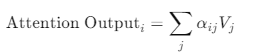

Это и есть выход механизма внимания для токена i, который содержит информацию о том, как все остальные токены влияют на него.

5. Многоголовое внимание (Multi-Head Attention):

Для усиления модели используют механизм многоголового внимания. Это значит, что внимание вычисляется несколько раз с разными весами  (каждая такая пара весов называется "головой"). Результаты всех голов конкатенируются и пропускаются через ещё одну линейную проекцию:

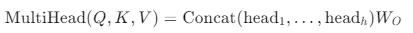

Каждая голова имеет свою собственную интерпретацию входных данных, что позволяет модели учиться на разных аспектах данных одновременно.

## Какая алгоритмическая сложность у attention?

Алгоритмическая сложность механизма внимания, особенно в классических трансформерах, определяется количеством вычислений для каждой пары токенов. Основная сложность связана с операцией **Self-Attention** в трансформерах, которая анализирует каждую пару токенов для создания значимого представления. 

1. **Self-Attention Complexity**
   - **Сложность**: O(n^2 * d) 
     - Здесь n  — количество токенов во входной последовательности, а  d  — размерность эмбеддингов.
   - **Почему (O(n^2))**: В стандартном self-attention каждый токен взаимодействует с каждым другим токеном. Это требует вычисления значений для всех возможных пар токенов, поэтому для последовательности длины (n) сложность по времени равна (O(n^2)).
   - **Почему (O(n^2 * d))**: Для каждой пары токенов также требуется матричное умножение с размерностью ( d ), что добавляет компонент (d).

2. **Сложность по памяти**
   - **Memory Complexity**: Операции self-attention также требуют (O(n^2)) памяти, так как нужно хранить матрицу вниманий для всех пар токенов, что ограничивает применение трансформеров к длинным последовательностям.

3. **Оптимизации для Self-Attention**
   Для снижения сложности и повышения эффективности на длинных последовательностях были разработаны альтернативы:
   - **Sparse Attention**: уменьшает число взаимодействий, оставляя лишь значимые пары токенов.
   - **Linformer, Longformer**: сокращают сложность до (O(n * log n)) и \(O(n)\), применяя ограничения на внимание.
   - **Efficient Transformers**: такие архитектуры, как Performer, применяют техники на основе рандомизации, чтобы снизить сложность.

Снижение сложности особенно актуально для больших последовательностей, так как при увеличении n классический self-attention становится вычислительно затратным.

## Как вычисляется матрица внимания и для чего нужны матрицы Query, Key и Value?

Для вычисления матрицы внимания используются три матрицы: Query (запрос), Key (ключ) и Value (значение).

1. **Query (Q)**: Представляет запрос текущего слова, показывая, к какой информации это слово "проявляет интерес".
2. **Key (K)**: Представляет "ключ" для каждого слова, описывая информацию, которую оно "предлагает" остальным словам.
3. **Value (V)**: Содержит фактическую информацию о слове, которая будет использоваться для создания конечного представления.
Для вычисления внимания:

Умножают матрицы Q и K, чтобы получить "похожесть" (скалярное произведение) между запросом и ключом. Эта операция показывает, насколько важным является каждое слово для текущего слова.\
Делят результат на корень квадратный из размера матрицы ключей для нормализации и применяют softmax для преобразования значений в вероятности.
Итоговая матрица весов умножается на матрицу V, что дает контекстные представления для каждого слова с учетом важных слов в последовательности.
Эти представления передаются на следующий слой, где они позволяют модели эффективно обрабатывать информацию в контексте всей последовательности.

## Откуда берутся векторы query, key, value? Что они из себя представляют?

В механизме внимания (attention) модели **Transformer** векторы **query**, **key** и **value** — это представления токенов, которые получаются из их эмбеддингов. Эти векторы играют ключевую роль в вычислении того, какие части входной последовательности должны «внимательно» рассматриваться для каждого токена.

1. **Что такое Query, Key и Value?**

- **Query (запрос)**: Это вектор, который представляет текущий токен и определяет, на что именно этот токен хочет обратить внимание. Он используется для вычисления того, насколько данный токен связан с другими токенами в последовательности.

- **Key (ключ)**: Вектор, который описывает содержимое каждого токена. Он используется для сопоставления с запросом (query), чтобы определить важность каждого токена для текущего запроса.

- **Value (значение)**: Вектор, содержащий информацию, которую текущий токен «несет» и которая будет передана в результирующее представление. Этот вектор будет использоваться для формирования нового представления токена после взвешивания на основе внимания.

2. **Как они получаются?**

Векторы **query**, **key** и **value** генерируются через линейные преобразования (линейные слои) из эмбеддингов токенов. На входе мы имеем эмбеддинги, которые являются векторами размерности d_model (например, 512 или 768 в зависимости от модели), а через линейные преобразования из этих эмбеддингов формируются три вектора: **query**, **key** и **value**. Размерность этих векторов обычно d_k для query и key, и d_v для value.

Каждый из этих векторов получается через умножение эмбеддинга токена на обучаемую матрицу весов. Таким образом, модель обучает разные представления для **query**, **key** и **value** на основе токен-эмбеддингов.

**Формально:**
Пусть эмбеддинг токена x_i — это вектор размерности d_model, и модель использует три обучаемые матрицы весов:

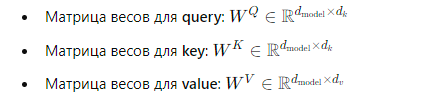

Тогда векторы query, key и value для токена x_i будут вычислены следующим образом:

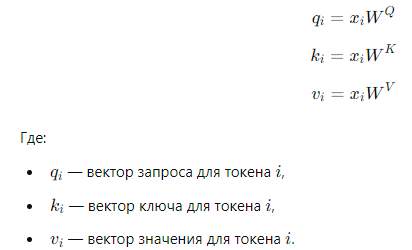

 3. **Пример**
Предположим, что входная последовательность состоит из трёх слов: **"The cat sleeps"**. Эти слова токенизируются и превращаются в эмбеддинги, например:
- "The" → x1
- "cat" → x2
- "sleeps" → x3

Для каждого из этих эмбеддингов x1, x2, x3 мы создаем три вектора — query, key и value — с помощью обучаемых матриц (W^Q), (W^K), и (W^V). Эти векторы затем используются для вычисления внимания (attention).

 4. **Как они используются в механизме внимания?**

После того, как векторы query, key и value сгенерированы, механизм внимания работает следующим образом:

- Для каждого токена его вектор **query** сравнивается с векторами **key** всех остальных токенов в последовательности с помощью скалярного произведения. Это измеряет, насколько каждый токен важен для текущего запроса.
- Результаты этого сравнения нормализуются с помощью softmax, чтобы получить веса внимания (то есть, какие токены важны для данного токена).
- Эти веса затем применяются к соответствующим векторам **value**, чтобы получить итоговое представление токена, которое учитывает информацию о других токенах в последовательности.

Формула для вычисления внимания:

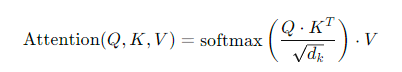

 5. **Зачем нужны три разных вектора?**
- **Query** задает, на что токен "хочет" обратить внимание.
- **Key** представляет, какие "ключевые" признаки несет каждый токен.
- **Value** несет фактическую информацию, которая будет передана токену на основании внимания.

Таким образом, модель может эффективно взаимодействовать между токенами, динамически определяя, какие части последовательности наиболее релевантны для текущего контекста.

 **Резюме:**
- **Query**, **Key** и **Value** — это вектора, которые получаются из эмбеддингов каждого токена через обучаемые линейные преобразования.
- Эти векторы используются для вычисления того, какие токены важны друг для друга в последовательности с помощью механизма внимания.
- **Query** отвечает за запрос внимания, **Key** описывает содержимое токена, а **Value** — это информация, которая передается другим токенам через механизм внимания.

## Зачем нормируем скалярное произведение в attention?

Нормирование скалярного произведения в механизме внимания (attention) выполняется для предотвращения **проблемы с большими значениями**, которые могут возникнуть при работе с высокоразмерными векторами **query** и **key**.

Основная причина нормировки: **Стабилизация градиентов**

Когда мы вычисляем внимание, основная операция — это **скалярное произведение** между векторами **query** и **key** для каждого токена. В случае высокоразмерных векторов, скалярное произведение может приводить к очень большим числам, поскольку оно суммирует произведения компонент векторов. Например, если у нас два вектора с размерностью dk, каждый из которых содержит относительно большие значения, то их скалярное произведение также будет большим.

Это может привести к следующим проблемам:
- **Нестабильность softmax**: Очень большие входные значения в функции **softmax** могут приводить к тому, что экспоненты этих значений становятся огромными. Это приводит к тому, что softmax начинает доминировать одним токеном (тем, у которого наибольшее значение), а остальные значения становятся близки к нулю. Это делает распределение внимания слишком резким, и модель становится менее способной захватывать информацию от разных токенов.
  
- **Проблемы с градиентами**: Когда значения скалярных произведений слишком большие, градиенты во время обратного распространения ошибки (backpropagation) могут становиться очень маленькими из-за использования функции softmax. Это приведёт к медленной обучаемости модели или проблемам с исчезающими градиентами.

Как решается проблема нормировкой?

Чтобы избежать этой проблемы, в Transformers вводят фактор нормировки — **деление на корень квадратный из размерности векторов dk**. Если dk — размерность векторов **key** и **query**, то при вычислении внимания используется формула:

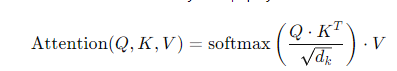

**Почему делим на sqrt(dk) ?**

1. **Математическая мотивация**: Скалярное произведение двух случайных векторов размерности dk имеет распределение с математическим ожиданием, пропорциональным размерности dk. Деление на sqrt(d_k) нормирует эти значения, чтобы они оставались в разумных пределах, независимо от размерности векторов. Это уменьшает дисперсию значений скалярных произведений и приводит к более стабильным результатам.

2. **Более плавные значения для softmax**: Нормировка уменьшает значения перед тем, как они попадают в softmax. Это предотвращает доминирование одного токена и делает распределение внимания более гладким. В результате, модель может эффективно учитывать информацию от большего количества токенов, что улучшает качество обучения.

3. **Устранение взрывных значений**: Векторы высокой размерности могут генерировать слишком большие скалярные произведения, которые могут вызвать взрывные экспоненты в softmax. Нормировка снижает риск возникновения таких больших чисел, обеспечивая, что внимание распределяется корректно.

Пример:

Предположим, у нас вектора **query** и **key** размерностью (dk = 64). Если их компоненты будут в среднем порядка 1, то их скалярное произведение может быть порядка 64. Экспонента числа 64 будет примерно (e^64), что очень большое значение, и в softmax это приведет к тому, что только одно значение будет доминировать, а остальные станут близкими к нулю. Деление на (sqrt(64) = 8) уменьшает это число до (8), что уже гораздо меньше, и экспонента от 8 (e^8) будет порядка (2980), что приводит к более корректному распределению в softmax.

Итог:
Нормирование скалярного произведения в механизме внимания важно для:
- Предотвращения проблем с очень большими значениями, особенно в случае высокоразмерных векторов.
- Стабилизации вычислений в softmax, чтобы предотвратить доминирование одного токена.
- Сохранения стабильных градиентов во время обратного распространения ошибки, что улучшает обучаемость модели.

Этот приём позволяет механизму внимания работать более корректно и эффективно в условиях высокоразмерных векторов.

## Какая размерность вектора dk как правило используется на практике?

В архитектуре Transformer размерность векторов **query**, **key** и **value** (обозначаемая как \(d_k\)) является гиперпараметром модели и обычно зависит от общей размерности модели (d_model). 

Стандартные значения \(d_k\):

На практике, в большинстве реализаций Transfomer, таких как оригинальная модель в статье *"Attention is All You Need"*, используется следующее соотношение:

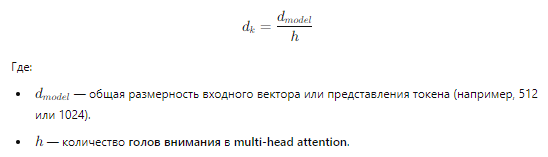

Таким образом, размерность (dk) — это размерность векторов query и key для **одной головы внимания**.

 Примеры значений на практике:

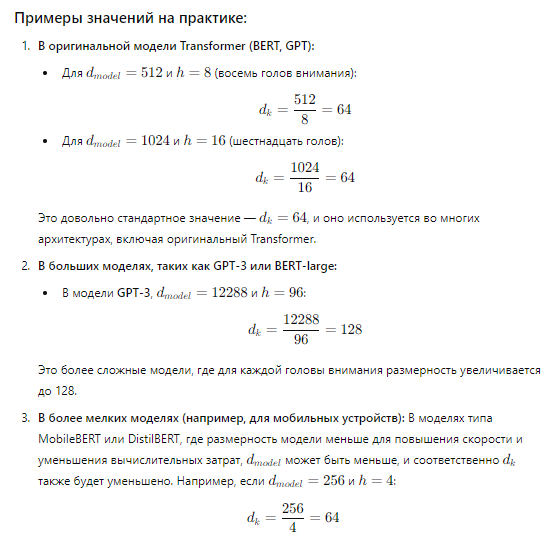

   
**Почему это соотношение?**

- **Разделение по головам внимания (multi-head attention)**. При разделении векторов на несколько голов h, размерность каждой отдельной головы уменьшается до dk, что позволяет каждой голове внимания независимо обрабатывать информацию, фокусируясь на разных аспектах входной последовательности.
  
 Резюме:
На практике, размерность dk для каждой головы внимания чаще всего составляет **64**, если используется стандартное количество голов (например, 8 или 16), и зависит от общей размерности модели  d_model. В более крупных моделях d_k  может быть выше, например, **128**, в зависимости от архитектуры.

## В чем разница query и key?

В механизме **self-attention** архитектуры Transformer, векторы **query** (запрос) и **key** (ключ) играют ключевые роли в процессе вычисления внимания, но они выполняют разные функции.

 1. **Query (запрос)**
Вектор **query** представляет собой запрос, который ищет важную информацию в последовательности. Каждый токен (слово) во входной последовательности имеет свой вектор query. Цель query — вычислить, насколько данный токен "внимателен" к остальным токенам в последовательности.

Когда модель обрабатывает токен, она с помощью query «спрашивает», какие другие токены важны для текущего.

 2. **Key (ключ)**
Вектор **key** используется для сравнения с query. Он кодирует информацию о каждом токене и представляет его как потенциальный источник важной информации для других токенов. Каждый токен в последовательности также имеет свой собственный вектор key.

Key используется для того, чтобы решать, насколько важен каждый токен относительно другого. По сути, ключ содержит описание токена, на основе которого будет вычислено, насколько он релевантен к запросу другого токена.

 3. **Как взаимодействуют query и key**
Когда токен "А" использует свой вектор query, он вычисляет **скалярное произведение** этого вектора с векторами key всех других токенов (включая себя). Эти скалярные произведения показывают, насколько каждый токен релевантен текущему запросу. Результат затем нормализуется с помощью softmax, чтобы получить веса внимания, которые указывают, насколько важно каждое слово для данного токена.

 4. **Пример:**
Допустим, у нас есть предложение: *"The cat sat on the mat."*

- Для токена "cat" вектор query будет задавать вопрос: "Какие токены важны для моего понимания?".
- Для каждого другого токена (например, "The", "sat", "on") будут вычисляться скалярные произведения между их векторами key и query токена "cat". Эти значения покажут, насколько каждый из этих токенов релевантен "cat".

 5. **Краткая разница:**
- **Query** — это вектор, с помощью которого каждый токен "спрашивает" другие токены: "Насколько вы важны для меня?".
- **Key** — это вектор, который каждый токен "предлагает", описывая свою информацию для того, чтобы другие токены могли оценить его важность.

##  В чем отличие между энкодером и декодером в трансформере?

Энкодер и декодер — два компонента архитектуры трансформера, предназначенные для различных этапов обработки данных:

- **Энкодер** - обрабатывает входную последовательность (например, текст) и создает её скрытое представление. Он состоит из нескольких слоев, каждый из которых обновляет представление входных данных, фокусируясь на взаимосвязях между словами.

- **Декодер** - берет скрытые представления от энкодера и, основываясь на них, генерирует выходную последовательность (например, перевод текста). Декодер также включает механизм внимания, который позволяет ему учитывать как ранее сгенерированные слова, так и информацию из энкодера.

Основное отличие в том, что энкодер принимает всю входную последовательность сразу и создает представление, тогда как декодер использует это представление, генерируя выход поэтапно и учитывая предыдущее состояние

## Какова структура слоев в энкодере и декодере?

И энкодер, и декодер состоят из повторяющихся слоев, но их структура имеет различия:

- Энкодер состоит из нескольких (обычно 6–12) одинаковых слоев, каждый из которых включает:

- - Self-attention механизм, который вычисляет внимание между всеми словами во входной последовательности.
  - Feed-forward сеть, применяемую к каждому слову независимо для улучшения его представления.
  -  Residual connection (остаточное соединение) и Layer normalization после каждого подслоя для улучшения процесса обучения.


- Декодер также состоит из нескольких (обычно 6–12) слоев, но включает дополнительный компонент:

- - Masked self-attention, который предотвращает доступ к будущим токенам в последовательности, чтобы сохранять каузальность в генерации текста.
  - Cross-attention механизм, который вычисляет внимание между выходными токенами декодера и скрытыми представлениями от энкодера.
  - Feed-forward сеть и Layer normalization, как и в энкодере.

##  Почему декодер использует masked self-attention? Как это помогает в задачах генерации текста?

**Masked self-attention** в декодере предотвращает доступ к будущим токенам в последовательности, то есть модель "видит" только предыдущие токены на каждом этапе генерации. В задачи генерации текста, такие как машинный перевод или автоподстановка текста, важно, чтобы модель не могла использовать информацию из будущих токенов, так как они ещё не сгенерированы и должны быть предсказаны.

**Как это помогает в задачах генерации текста:** Masked self-attention обеспечивает каузальность (последовательность), так что модель генерирует следующий токен, опираясь только на уже предсказанные токены. Это позволяет избежать "читерства" — использования данных из будущего — и добиваться правдоподобного предсказания на каждом шаге генерации, поскольку модель фокусируется только на уже доступных данных.

## Зачем используются residual connections и как они влияют на обучение трансформера?

**Residual connections, или остаточные соединения**, — это прямые соединения, добавляемые между входом и выходом каждого подслоя (например, self-attention или feed-forward) в трансформере. Остаточные соединения помогают избежать проблем затухающих и взрывающихся градиентов, которые часто возникают при глубоких нейронных сетях.

Эти соединения обеспечивают следующие преимущества для обучения трансформера:

- Ускоряют сходимость. Остаточные соединения облегчают обратное распространение градиентов, позволяя модели быстрее обучаться и избегать локальных минимумов.
- Стабилизируют обучение. Они помогают модели избегать разрушения информации, которое может происходить при многократном прохождении через слои.
- Улучшают передачу градиентов. Благодаря residual connections, информация из предыдущих слоев может проходить к более глубоким слоям, что особенно важно для очень глубоких трансформеров.

Таким образом, остаточные соединения помогают сделать процесс обучения более устойчивым и позволяют трансформеру извлекать более сложные зависимости в данных.

## Как работает layer normalization в трансформере, и почему она применяется?

**Layer normalization** нормализует активации нейронов в пределах каждого подслоя для каждого токена, обеспечивая, чтобы значения в каждом слое имели стабилизированные статистические свойства (например, среднее и стандартное отклонение). В трансформере layer normalization выполняется следующим образом:

1) Вычисляется среднее и стандартное отклонение для каждого токена в пределах слоя.
2) Нормализуются значения активации (с вычитанием среднего и делением на стандартное отклонение) для каждого токена.
3) Применяются обучаемые параметры сдвига и масштаба, чтобы нормализованные значения могли быть скорректированы, позволяя модели сохранять гибкость.

Почему она применяется:

Layer normalization улучшает обучение трансформера, так как:

- Стабилизирует значения активации, что особенно важно в глубокой модели. Это помогает предотвратить резкие изменения и позволяет модели сосредоточиться на важных признаках.
- Ускоряет сходимость. Нормализация позволяет модели быстрее достигать хороших результатов, уменьшая колебания градиентов во время обратного распространения.
- Снижает зависимость от начальных весов и повышает устойчивость при обучении, что полезно для обработки больших объемов данных и длинных последовательностей.

Благодаря layer normalization, трансформеры достигают более стабильного и быстрого обучения, повышая точность и надежность в задачах NLP.

## Какие типы потерь и функции активации обычно используются в трансформерах?

**Типы потерь:**

- Для задач классификации и извлечения информации (например, named entity recognition) в трансформерах часто используется кросс-энтропийная функция потерь, которая помогает минимизировать расхождение между предсказанными и истинными метками классов.
- Для задач генерации текста также применяется кросс-энтропийная потеря, поскольку она хорошо работает с последовательными данными и позволяет модели лучше предсказывать слова, минимизируя расхождение с целевой последовательностью.
- В задачах ранжирования (например, при выборе наиболее релевантного ответа) может использоваться ранговая функция потерь (например, ранжирование на основе NDCG или MRR), чтобы измерять правильность порядка предсказаний.

**Функции активации:**

- В скрытых слоях трансформера в основном используется функция активации ReLU или GELU (Gaussian Error Linear Unit). GELU немного сложнее, чем ReLU, но считается более подходящей для обработки текстовых данных, поскольку она может лучше учитывать характеристики распределения входных данных.
- В self-attention механизме функции активации обычно не используются, а вместо этого применяется softmax для нормализации весов внимания.

## Как решаются проблемы градиентного затухания или взрыва в трансформерах?

Проблемы градиентного затухания и взрыва могут возникнуть в глубоких нейронных сетях, когда градиенты становятся слишком малыми или слишком большими, что замедляет или дестабилизирует обучение. В трансформерах эти проблемы решаются следующими методами:

- Остаточные (residual) соединения позволяют градиентам свободно проходить через слои, помогая избежать их затухания и улучшая передачу информации.
- Layer normalization стабилизирует значения активаций внутри каждого слоя, предотвращая резкие изменения градиентов.
- Градиентный клиппинг (gradient clipping) используется для ограничения слишком больших значений градиентов, предотвращая взрыв градиентов.
- Инициализация весов также играет роль: веса инициализируются так, чтобы градиенты были более устойчивыми.

Эти методы помогают трансформеру достигать стабильного обучения даже при глубокой архитектуре.

## Почему важно использовать маски при обработке последовательностей разной длины?

Маски необходимы при обработке последовательностей разной длины, чтобы:

- Обеспечить корректное вычисление внимания. Маски позволяют модели игнорировать паддинговые токены, введенные для выравнивания длины последовательностей в пакете. Это предотвращает влияние искусственных данных (паддинга) на вычисление весов внимания, фокусируя модель только на значимых данных.
- Сохранить последовательность при генерации текста. В декодере маски используются для блокирования будущих токенов (masked self-attention), чтобы модель предсказывала текущий токен, опираясь только на предыдущие.
- Улучшить эффективность вычислений. При использовании масок ресурсы модели фокусируются на реальных данных, что может ускорить вычисления и улучшить обучение.

Таким образом, маски помогают трансформерам эффективно и точно работать с последовательностями переменной длины, минимизируя влияние паддинга и сохраняя каузальность.

## Чем отличаются BERT, GPT и T5 в архитектуре и назначении?

BERT, GPT и T5 — это модели, основанные на трансформерах, но с разными архитектурами и задачами:

- **BERT (Bidirectional Encoder Representations from Transformers)**

**BERT** — это энкодерная модель, которая обучается понимать контекст, анализируя текст в обоих направлениях (слева-направо и справа-налево). Основное назначение BERT — задачи, требующие понимания текста, такие как классификация текста, извлечение информации и ответы на вопросы.

Архитектурно BERT использует только энкодерную часть трансформера и обучается на задаче masked language modeling (MLM), в которой некоторые слова маскируются, и модель учится восстанавливать их, анализируя двусторонний контекст.

- **GPT (Generative Pre-trained Transformer)**

**GPT** — это декодерная модель, которая фокусируется на задачах генерации текста. Модель обучается предсказывать следующее слово на основе предыдущих, что делает её односторонней (анализирует текст слева направо).
Основное назначение GPT — генерация связного текста, например, написание ответов, создание текста на основе запроса и текстовые завершения. GPT использует только декодерную часть трансформера и обучается на задаче language modeling, в которой модель генерирует текст последовательно, предсказывая слово за словом.

- **T5 (Text-To-Text Transfer Transformer)**

**T5** — это модель энкодер-декодер, адаптированная под задачи преобразования текста, где и вход, и выход представлены в текстовом формате. Модель обучается выполнять задачи в формате "вход — текст, выход — текст", что делает её универсальной для всех задач NLP, от перевода до генерации и классификации.
T5 использует полную архитектуру энкодер-декодер и поддерживает задачи как классификации (например, "topic classification") так и генерации (например, "перевод"). Это позволяет применять её в любом сценарии, где требуются преобразования текста.

## Объясни подробно архитектуру T5

**T5 (Text-To-Text Transfer Transformer)** — это универсальная модель трансформера, разработанная Google для выполнения различных задач обработки текста. Вся архитектура T5 построена на основе принципа "text-to-text": любая задача обработки естественного языка представляется в виде текстового ввода и текстового вывода, что позволяет адаптировать T5 для разных NLP задач, таких как перевод, суммаризация, классификация и генерация текста.

**Основные компоненты архитектуры T5**

T5 представляет собой **энкодер-декодер трансформер**, где:
1. **Энкодер** обрабатывает входную текстовую последовательность и создает контекстные представления для каждого токена.
2. **Декодер** использует эти представления, чтобы генерировать выходную текстовую последовательность.

Эта архитектура позволяет модели как извлекать смыслы из текста (энкодер), так и создавать связный текст (декодер), что делает её мощной для широкого спектра задач.

**1. Энкодер**

Энкодер T5 структурно аналогичен классическому энкодеру трансформера, состоящему из нескольких слоев. Каждый слой энкодера включает следующие основные компоненты:

- **Self-Attention механизм**:  
  Self-attention позволяет каждому токену "внимательно" обрабатывать все остальные токены в предложении, формируя понимание контекста. Это важно, так как токены получают представления, зависящие от других частей текста.
  
- **Feed-Forward Network (FFN)**:  
  После self-attention механизма токены обрабатываются через feed-forward слой, который состоит из двух линейных слоев и функции активации. Это позволяет модели обучаться более сложным представлениям для каждого токена.

- **Residual Connections и Layer Normalization**:  
  Остаточные соединения и layer normalization добавляются после self-attention и feed-forward слоёв для стабилизации обучения и улучшения передачи информации через слои.

Энкодер не имеет маскирования, так как все токены доступны для обработки, и модель обучается учитывать весь контекст.

**2. Декодер**

Декодер также состоит из нескольких слоев, каждый из которых содержит три основных компонента:

- **Masked Self-Attention механизм**:  
  Маскированный self-attention применяется, чтобы декодер мог видеть только предыдущие токены, что важно для генерации текста. Эта "каузальная" структура гарантирует, что предсказания будущих токенов зависят только от предыдущих и текущих токенов, но не от будущих.

- **Cross-Attention механизм**:  
  Cross-attention позволяет декодеру использовать скрытые представления энкодера, чтобы лучше понимать контекст исходного текста и генерировать корректный ответ или перевод. Декодер "внимательно" обрабатывает представления из энкодера, что позволяет ему адаптироваться к разным частям входного текста.

- **Feed-Forward Network (FFN)**:  
  После attention слоёв декодер также имеет feed-forward слой для обработки и преобразования данных.

Декодер также использует residual connections и layer normalization для стабилизации обучения, аналогично энкодеру.

3. Задача "text-to-text" и предобучение

T5 был предобучен на огромном количестве текстов с использованием задачи **Masked Language Modeling (MLM)**, известной как **Span Corruption**. В отличие от классического MLM, где маскируются отдельные токены, в T5 маскируются случайные фрагменты текста (spans). Модель обучается восстанавливать эти фрагменты на основе контекста, что делает её более устойчивой к задачам генерации и реконструкции текста.

4. **Архитектурные особенности и оптимизации**

- **Без позиции [CLS] или [SEP]**:  
  В отличие от BERT, T5 не использует специальных токенов [CLS] и [SEP]. Вместо этого он напрямую обрабатывает последовательности как текст.

- **Словарные и позиционные эмбеддинги**:  
  T5 использует словарные эмбеддинги и обучаемые позиционные эмбеддинги, чтобы учитывать порядок токенов.

- **Normalization и активации**:  
  В T5 используется ReLU активация и layer normalization после каждого слоя.

- **Реформатирование задачи**:  
  При помощи текстовых "префиксов" задачи переводятся в текстовый формат. Например, для задачи перевода на английский текст запроса будет начинаться с "translate English to German:", и T5 поймет, что его цель — перевод.

**Применение T5 для разных задач NLP**

- **Классификация текста**:  
  T5 адаптируется к классификации, если обучить модель на задачи с метками. В этом случае модель генерирует текстовые метки, которые можно конвертировать в числовые классы.

- **Суммаризация и генерация**:  
  Для задач суммаризации и генерации декодер модели генерирует связный текст, основываясь на представлениях энкодера и создавая текст в стиле последовательного предсказания.

- **Перевод текста и другие преобразования**:  
  T5 также эффективно работает для задач перевода и любых преобразований текста, где требуются текстовые вход и выход. Это обеспечивается гибкой архитектурой энкодер-декодер.

**Преимущества T5**

- **Универсальность**:  
  Модель "text-to-text" позволяет использовать один и тот же формат для разных задач, что упрощает применение модели и делает её универсальной.

- **Гибкость энкодера-декодера**:  
  Архитектура энкодер-декодер позволяет T5 лучше использовать входной контекст и создавать более осмысленные выходные данные, чем односторонние модели, такие как GPT.

- **Поддержка различных уровней обучения**:  
  T5 легко дообучать на конкретных задачах, переформатируя задачи в text-to-text, что упрощает её использование для прикладных задач NLP.

Таким образом, T5 сочетает в себе универсальность и способность к генерации, обеспечивая высокую точность и производительность на широком спектре задач NLP.

## Какие эмбеддинги используются в трансформере? Как они получаются?

В модели **Transformer** используются два типа эмбеддингов:

1. **Токен-эмбеддинги** (Token embeddings)
2. **Позиционные эмбеддинги** (Positional embeddings)

Каждый из этих типов эмбеддингов играет важную роль, и они вместе создают входное представление для модели. Давайте рассмотрим каждый из них подробнее.

---

1. **Токен-эмбеддинги**

Это векторы, которые представляют каждый токен в последовательности (например, слово или часть слова) в виде числового вектора фиксированной размерности. Они используются для преобразования токенов, представленных в виде чисел (индексов из словаря), в эмбеддинги, которые затем передаются в модель Transformer.

**Как они получаются?**

- **Токенизация**: Перед тем как создать эмбеддинги, текстовое предложение делится на токены. Это может быть полное слово, подслово или символ, в зависимости от используемой токенизаторной схемы (например, Byte-Pair Encoding (BPE) в BERT, GPT или WordPiece в BERT).
- **Embedding слой**: Для каждого токена из словаря создается вектор эмбеддинга фиксированной размерности \(d_{model}\). Это можно рассматривать как матрицу \(V\), где каждая строка соответствует одному токену, а её значения — это обучаемые параметры.

Например, если у вас есть \( N \) токенов в словаре и размерность модели \( d_{model} = 512 \), то матрица эмбеддингов будет иметь размерность \(N \times 512\). Когда токен преобразуется в индекс, вы просто выбираете соответствующую строку из этой матрицы, чтобы получить эмбеддинг.

- **Обучаемые параметры**: Эмбеддинги токенов — это обучаемые параметры модели, которые изменяются в процессе обучения. Они постепенно адаптируются для представления семантики токенов в контексте задачи.

**Пример**:
- Для токена "apple" модель может преобразовать его в вектор размером 512 (в случае модели с \(d_{model} = 512\)), и этот вектор будет представлять все важные характеристики этого слова (семантические и синтаксические) в контексте задачи.

---

2. **Позиционные эмбеддинги**

Поскольку механизм **внимания** в Transformer не учитывает порядок токенов в последовательности (он симметричен, и токены обрабатываются независимо друг от друга), необходимо дополнительно добавить информацию о положении токенов. Позиционные эмбеддинги (Positional Encodings) позволяют модели учитывать порядок токенов в предложении.

**Как они получаются?**

Есть два основных подхода к созданию позиционных эмбеддингов:

1. **Синусоидальные позиционные эмбеддинги (sinusoidal positional encodings)** — используются в оригинальной модели Transformer.
   
   Позиционные эмбеддинги вычисляются с помощью периодических функций (синуса и косинуса) с различными частотами для каждого измерения эмбеддинга. Таким образом, модель получает уникальный вектор для каждого положения токена в последовательности.

   Формулы:
   \[
   PE(pos, 2i) = \sin\left(\frac{pos}{10000^{2i/d_{model}}}\right)
   \]
   \[
   PE(pos, 2i+1) = \cos\left(\frac{pos}{10000^{2i/d_{model}}}\right)
   \]
   
   Где:
   - \(pos\) — позиция токена в последовательности.
   - \(i\) — индекс вектора эмбеддинга (размерность).
   - \(d_{model}\) — размерность эмбеддинга модели.

   Эти функции генерируют синусоидальные волны разной частоты, что позволяет различать позиции токенов на разных масштабах (как для коротких, так и для длинных последовательностей). Преимущество синусоидальных эмбеддингов заключается в том, что они позволяют модели легко интерполировать на последовательности, длины которых больше, чем при обучении.

2. **Обучаемые позиционные эмбеддинги (learnable positional embeddings)** — альтернативный подход, когда позиционные эмбеддинги представляют собой обучаемые параметры, подобно токен-эмбеддингам.

   - В этом подходе каждому положению токена \( pos \) соответствует отдельный обучаемый вектор. Это похоже на токен-эмбеддинги, но вместо токена в качестве индекса используется его позиция.
   - На практике обучаемые позиционные эмбеддинги могут быть немного более гибкими, так как модель сама обучает, как эффективно кодировать позиции токенов.

**Пример:**
- Для последовательности из 10 токенов модель добавит к каждому токену уникальный вектор, который будет кодировать его положение — первый токен получит один позиционный вектор, второй — другой и т.д.

---

**Как токен- и позиционные эмбеддинги объединяются?**

Для каждого токена в последовательности его **токен-эмбеддинг** и **позиционный эмбеддинг** суммируются для получения итогового представления. Это результат передается в следующий слой модели (например, в многоголовое внимание).

Формально:
\[
\text{Input embedding} = \text{Token embedding} + \text{Positional embedding}
\]

Эта операция происходит для каждого токена, чтобы учесть не только его смысловое содержание, но и его положение в последовательности.

---

**Резюме**

- **Токен-эмбеддинги** представляют собой обучаемые векторы, которые преобразуют токены текста в числовые представления (эмбеддинги) фиксированной размерности.
- **Позиционные эмбеддинги** добавляют информацию о порядке токенов в предложении, используя либо синусоидальные функции, либо обучаемые векторы.
- **Сумма токен- и позиционных эмбеддингов** используется как вход для модели Transformer, чтобы учитывать как содержательную информацию токена, так и его позицию в предложении.

Этот подход позволяет модели эффективно работать с последовательными данными и понимать как содержание, так и порядок токенов.

## Какой размерности используются словари для эмбеддингов?

Размерность словаря эмбеддингов в трансформер-моделях зависит от нескольких факторов:

1. **Размер словаря токенов (Vocabulary Size)**:
   - **Словарь (vocab size)** — это количество уникальных токенов, которые могут быть представлены в модели. Для разных моделей используется различный размер словаря. Например:
     - **BERT** использует словарь размером **~30,000 токенов**.
     - **GPT-3** имеет словарь около **50,000 токенов**.
     - **RoBERTa** также использует словарь из **~50,000 токенов**.
     - Размер словаря может увеличиваться в зависимости от количества языков или типов данных, которые обрабатывает модель (например, для мультиязычных моделей словарь будет больше).

2. **Размерность эмбеддингов (Embedding Dimensionality)**:
   - Эмбеддинг каждого токена представлен вектором фиксированной длины, который называется размерностью эмбеддинга. Этот размер обычно составляет:
     - **768** для малых моделей (например, BERT-base).
     - **1024** для более крупных моделей (например, GPT-2 large, BERT-large).
     - **2048** или даже больше для очень больших моделей (например, GPT-3).
     - Размерность эмбеддинга зависит от конфигурации модели и масштабов задач, для которых она предназначена. Чем выше размерность, тем больше информации может содержать каждый вектор, но это также увеличивает вычислительные затраты и требования к памяти.

**Выбор размера словаря:**
При выборе размера словаря для новой модели важно учитывать:
- **Тип данных**: Если данные содержат большое разнообразие слов или символов (например, текст из нескольких языков), может потребоваться больший словарь.
- **Цель задачи**: Для специализированных задач, где встречается ограниченный набор терминов (например, медицинские тексты), может быть достаточно меньшего словаря.
- **Модель токенизации**: Разные методы токенизации (WordPiece, BPE) по-разному определяют размер словаря. Некоторые токенизаторы могут представлять слова в виде нескольких токенов, что позволяет уменьшить размер словаря.

Таким образом, размер словаря и размерность эмбеддингов варьируются в зависимости от модели и задачи. Важно находить баланс между вычислительными ресурсами и точностью модели при выборе этих параметров.

## Почему важно увеличивать размер словара токенов?

Увеличение размера словаря токенов в моделях NLP, таких как BERT, GPT и другие трансформеры, может быть важным по нескольким причинам:

 1. **Охват большего разнообразия лексики**:
   Больший словарь позволяет модели покрыть больше уникальных слов или подслов. Это особенно важно при работе с разнообразными текстами, включающими редкие или специализированные слова. Например, в моделях, обученных на мультиязычных данных, увеличение словаря помогает включить специфичные токены для разных языков и уменьшить количество токенов для каждого отдельного слова, сохраняя контекст.

 2. **Меньше оверсегментации (разделения слов на части)**:
   Когда размер словаря небольшой, токенизатор может разделять одно слово на несколько токенов. Это происходит, когда модель не может найти слово в своем словаре. Например, сложные или редкие слова могут быть разбиты на множество токенов, что увеличивает длину последовательности и может ухудшить производительность модели. Большой словарь помогает минимизировать такие ситуации, позволяя модели использовать целые слова или более крупные части слова.

   **Пример**: В модели с маленьким словарем слово "transformers" может быть разбито на подслова "trans", "form", и "ers". Модель с большим словарем может обрабатывать слово целиком, что уменьшает длину последовательности и снижает сложность обработки.

 3. **Меньше проблем с OOV (Out-Of-Vocabulary)**:
   Модель с небольшим словарем может не знать многих слов, которые могут встретиться в тестовых данных (это называется OOV — out-of-vocabulary). Когда модель сталкивается с неизвестным словом, она не может его эффективно обработать, что ведет к потере информации и ухудшению результатов. Увеличенный словарь снижает количество OOV-ситуаций, улучшая способность модели к генерализации.

 4. **Улучшение качества обработки специализированных доменов**:
   В некоторых областях (например, медицина, юриспруденция, наука) часто встречаются специфичные термины, которые не входят в стандартные словари общего назначения. Если размер словаря мал, такие слова могут быть разбиты на подслова или токены, что ухудшает точность. Увеличение словаря позволяет включить такие термины и улучшить качество обработки специализированных текстов.

**Баланс между размером словаря и эффективностью:**
   Несмотря на явные преимущества большого словаря, есть и **недостатки**:
   - **Повышенные вычислительные затраты**: Больший словарь требует больше памяти для хранения эмбеддингов и большего объема вычислений для обработки текста.
   - **Переобучение**: Если размер словаря слишком велик и модель обучена на недостаточно разнообразных данных, это может привести к переобучению на редких токенах.

Таким образом, выбор размера словаря — это баланс между улучшением охвата лексики и вычислительными затратами.

# LLM

## Как работает LoRA алгоритм?

**LoRA (Low-Rank Adaptation)** — это метод для эффективного дообучения крупных языковых моделей (LLMs) с минимальными затратами на вычислительные ресурсы и память. LoRA позволяет адаптировать большие модели, обучая только небольшое количество дополнительных параметров, вместо того чтобы дообучать всю модель целиком.

**Как работает LoRA**:

Основная идея LoRA заключается в том, чтобы заменить обновления весов полной размерности на low-rank аппроксимации, что значительно уменьшает количество обучаемых параметров, сохраняя при этом производительность модели.

**Шаги алгоритма:**

1. **Фиксация исходных весов**:
   - Модель с крупными параметрами, например, трансформер, замораживается. Это означает, что исходные веса модели остаются неизменными, и их дообучение не происходит.
   - Вместо этого, в LoRA добавляются дополнительные параметры для обновления модели, которые будут обучаться.

2. **Low-rank аппроксимация**:
   - В каждом линейном слое трансформера или другой нейросети (например, `W`), обучаемые веса аппроксимируются как произведение двух матриц с меньшими размерностями (рангом).
   - Исходные веса представляются как произведение матриц низкого ранга: 
 
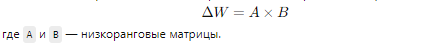

   - Веса `A` и `B` гораздо меньше исходных параметров `W`, что позволяет снизить вычислительные затраты. Например, если исходные веса имеют размерность \(d \times d\), то матрицы `A` и `B` будут иметь размерности d*r и r*d, где r — значительно меньше d.

3. **Обновление только low-rank параметров**:
   - В процессе дообучения модели обновляются только параметры матриц `A` и `B`, в то время как исходные веса остаются неизменными.
   - Таким образом, модель фактически обновляет лишь небольшое количество параметров, представляющих изменения весов через low-rank матрицы, что значительно ускоряет обучение.

4. **Суммирование изменений**:
   - После того как матрицы `A` и `B` обучены, итоговые веса модели на этапе инференса представляются как сумма исходных весов и обновлений:



   - Это позволяет адаптировать модель к новым данным без полного пересмотра всех весов, сохраняя исходные параметры и дообучая только низкоранговые компоненты.

**Преимущества LoRA:**

1. **Экономия памяти**: Обучаемые параметры в LoRA (матрицы `A` и `B`) значительно меньше по размеру, чем исходные веса модели, что экономит память и снижает требования к вычислительным ресурсам. Это делает LoRA особенно полезной для дообучения крупных моделей (с миллиардами параметров) на ограниченных устройствах (например, на одной GPU).
   
2. **Эффективность обучения**: Так как заморожены исходные веса, и дообучаются только небольшие низкоранговые матрицы, процесс обучения становится более быстрым, чем при полном дообучении модели.

3. **Модульность**: LoRA можно легко добавлять к существующим моделям без необходимости значительной модификации архитектуры. Это делает LoRA гибким инструментом для fine-tuning.

4. **Минимальная деградация качества**: Несмотря на уменьшение количества обучаемых параметров, LoRA сохраняет высокое качество предсказаний за счет того, что обновления весов происходят через low-rank аппроксимации.

**Пример использования LoRA:**

Представим, что мы хотим дообучить большую трансформерную модель на новой задаче с ограниченными вычислительными ресурсами. Вместо того чтобы дообучать всю модель, мы можем добавить LoRA-модули к линейным слоям. Эти модули обучают лишь низкоранговые компоненты (матрицы `A` и `B`), что требует намного меньше памяти и вычислений. После обучения мы можем использовать модель с обновленными весами, которые представляют собой сумму исходных весов и дообученных low-rank матриц.

**Заключение:**

**LoRA** — это методика, которая помогает эффективно и экономично дообучать крупные языковые модели, сокращая количество обучаемых параметров с помощью low-rank аппроксимаций. Это делает возможным fine-tuning больших моделей на ограниченных вычислительных ресурсах и упрощает процесс переноса моделей на новые задачи.

## Что такое q-lora алгоритм?

**QLoRA (Quantized Low-Rank Adaptation)** — это метод, разработанный для эффективного адаптирования крупных языковых моделей (LLMs) с использованием квантования и low-rank адаптации. Этот алгоритм предназначен для того, чтобы сэкономить вычислительные ресурсы и память при дообучении моделей, обеспечивая при этом высокую производительность.

Основные идеи QLoRA:
- **Квантование весов**: QLoRA использует технику квантования весов модели для снижения их разрядности (например, перевод весов из 16-битного формата в 4-битный). Это значительно уменьшает объем занимаемой памяти, при этом влияние на производительность остается минимальным.
- **Low-rank адаптация (LoRA)**: В дополнение к квантованию, QLoRA применяет low-rank адаптацию, которая позволяет эффективно обучать только небольшой набор параметров, добавленных к модели. Это особенно полезно при fine-tuning крупных моделей, когда важно уменьшить объем вычислений.
- **Совместимость с крупными моделями**: QLoRA позволяет адаптировать модели с миллиардами параметров на ограниченных ресурсах, таких как одна GPU с 24 ГБ памяти, что делает дообучение доступным для более широкого круга разработчиков.

**Основные компоненты:**
1. **4-битное квантование**:
   - В QLoRA весовые параметры модели квантируются в 4-битный формат. Это снижает объем памяти, необходимый для хранения модели, и уменьшает количество вычислений, что ускоряет процесс.
   - Алгоритм поддерживает **квантование с ошибками реконструкции** для обеспечения минимальной потери точности.

2. **LoRA-модули**:
   - Для сокращения количества обучаемых параметров QLoRA добавляет "low-rank" матрицы к весам модели, позволяя дообучать лишь эти низкоранговые компоненты. При этом веса модели остаются неизменными.
   - LoRA применяет приближение к матричным операциям, снижая затраты на обучение модели, сохраняя при этом качество предсказаний.

3. **Доступность для крупномасштабного обучения**:
   - Благодаря квантованию и low-rank адаптации, QLoRA позволяет fine-tuning больших моделей (таких как GPT-3, GPT-4) даже на потребительских графических картах, что делает его чрезвычайно привлекательным для практического применения.

**Применение:**

- **Fine-tuning** LLM на специфических задачах и датасетах без необходимости полного переобучения модели.
- **Экономия памяти**: Сокращение памяти при хранении модели и уменьшение вычислительных затрат делает этот метод идеальным для приложений, где ресурсы ограничены.
- **Применение на GPU с малой памятью**: Возможность дообучения больших моделей на одной GPU с ограниченной памятью (например, 24 ГБ), что раньше требовало гораздо более мощных вычислительных систем.

**Преимущества:**

- **Экономия вычислительных ресурсов**: QLoRA позволяет обучать большие модели с существенно меньшими затратами, сохраняя высокую производительность.
- **Гибкость и масштабируемость**: Этот метод подходит как для небольших устройств, так и для крупных кластеров.
- **Меньшая деградация качества**: Использование квантования и low-rank адаптации снижает негативное влияние на точность модели по сравнению с классическими методами сжатия.

**Пример использования:**
Модель, такая как GPT-3, которая изначально требует сотни гигабайт видеопамяти для fine-tuning, может быть адаптирована с помощью QLoRA на одной GPU с 24 ГБ памяти, сохраняя при этом высокую точность предсказаний.

QLoRA делает возможным эффективное и экономичное дообучение крупномасштабных моделей, что является важным шагом в развитии методов работы с LLM и других крупных моделей машинного обучения.

## Что такое function calling применительно к LLM? Как его использовать?

**Function calling** применительно к большим языковым моделям (LLM) — это концепция, при которой модель вызывает определённые функции или API для выполнения конкретных задач или получения данных из внешних источников. Это позволяет расширить функциональность LLM за пределы простого текстового взаимодействия, предоставляя возможность модели интегрироваться с другими системами и программами для выполнения сложных операций.

**Как работает function calling в LLM?**

1. **Интерфейс для вызова функций**: В функцию передается структурированный запрос (обычно в формате JSON или другого API-подобного протокола), и LLM отвечает, вызывая заданную функцию.
2. **Ответ от LLM**: Модель может автоматически понимать и составлять запросы для функций, анализируя ввод пользователя.
3. **Интеграция с внешними API**: LLM может отправлять запросы к сторонним системам или базам данных и возвращать структурированные ответы. Это может включать, например, получение информации о погоде, бронирование поездок, выполнение сложных вычислений и многое другое.

**Пример сценария function calling**

Допустим, пользователь хочет узнать текущую погоду в конкретном городе. Модель на основе текста запроса генерирует вызов функции, которая обращается к API сервиса погоды и возвращает результат.

```json
{
  "function_name": "get_weather",
  "parameters": {
    "city": "Moscow",
    "unit": "Celsius"
  }
}
```

Модель интерпретирует запрос и использует API погоды для получения данных о температуре и других погодных условиях.

**Применение function calling**

1. **Автоматизация задач**: LLM может вызывать функции для автоматизации различных задач, таких как отправка сообщений, выполнение поиска, работа с базами данных.
2. **Интерактивные системы**: Разработка чат-ботов или систем поддержки пользователей, которые интегрируются с внешними системами для ответов на вопросы.
3. **Управление данными**: Использование LLM для вызова функций, которые обрабатывают, фильтруют или анализируют большие объёмы данных.
4. **Решение сложных задач**: Вместо того чтобы просто давать текстовые ответы, LLM может вызывать специализированные функции для решения задач (например, математических или аналитических).

**Как использовать function calling**

Для использования function calling в контексте LLM, необходимо:

1. **Определить функции**: Это могут быть Python-функции или API-запросы к сторонним сервисам.
2. **Создать интерфейс для взаимодействия**: LLM должен иметь возможность формировать и отправлять запросы для этих функций.
3. **Обработать ответы**: Ответы от функций должны возвращаться в виде, понятном для пользователя, будь то текстовый вывод, графики или структура данных.

Использование function calling позволяет значительно улучшить возможности LLM, делая их частью более сложных систем и сценариев использования.

## Что такое sft и rlhf обучение llm? как оно работает?

**SFT (Supervised Fine-Tuning)** и **RLHF (Reinforcement Learning with Human Feedback)** — это два ключевых метода обучения больших языковых моделей (LLM), таких как GPT, для улучшения их качества и полезности на различных задачах.

1. **Supervised Fine-Tuning (SFT)**

**SFT** — это процесс дообучения (fine-tuning) модели на основе размеченных данных под присмотром (supervision). Это обучение с учителем, где модель обучается предсказывать правильные ответы, основываясь на примерах, предоставленных в тренировочном наборе.

**Как работает SFT:**
- **Размеченные данные**: Для обучения модели собирается корпус текстов с размеченными данными, где каждому примеру (входу) сопоставляется правильный ответ (выход).
- **Дообучение модели**: Модель, уже предобученная на большом корпусе данных, дообучается на более специфической задаче, что позволяет ей лучше справляться с узконаправленными задачами (например, ответами на вопросы, генерацией текста в определенном стиле и т. д.).
- **Цель**: Цель SFT — настроить модель на конкретную задачу, чтобы она могла предсказывать ответы с высокой точностью на основе того, чему она научилась из размеченных данных.

Пример: Дообучение GPT на задаче генерации инструкций или вопросов и ответов с использованием размеченных данных, чтобы улучшить производительность в реальных сценариях.

2. **Reinforcement Learning with Human Feedback (RLHF)**

**RLHF** — это метод обучения, в котором используется усиление с подкреплением (reinforcement learning), а обратная связь дается человеком (human feedback). Этот подход используется для дообучения модели с учетом предпочтений человека, что позволяет модели становиться более «гуманизированной» в ответах и действиях.

**Как работает RLHF:**
1. **Инициализация с помощью SFT**: На первом этапе модель обучается с использованием SFT для выполнения задачи на основе размеченных данных.
2. **Генерация вариантов ответов**: Модель генерирует несколько вариантов ответов на запросы.
3. **Оценка человеком**: Человек (аннотаторы) оценивают различные ответы модели по тому, насколько они полезны, точны, и отвечают запросу.
4. **Обучение через RL**: На основе оценок человека обучается **модель награды** (reward model), которая оценивает качество генераций. После этого модель дообучается с использованием методов обучения с подкреплением (например, **Proximal Policy Optimization, PPO**) для улучшения ответов, которые высоко оцениваются по модели награды.

**Цель RLHF:**
- Повысить качество и соответствие ответов модели реальным ожиданиям людей.
- Улучшить генерации модели в условиях, где есть двусмысленность или различные возможные ответы.
  
**Пример работы RLHF:**
В контексте обучения LLM для диалогов (например, ChatGPT), RLHF позволяет сделать ответы более вежливыми, информативными и полезными для пользователей, что повышает их общую удовлетворенность.

**В каких случаях использовать эти методы:**
- **SFT** — используется, когда нужно дообучить модель на конкретной задаче, где есть большое количество размеченных данных.
- **RLHF** — применяется, когда требуется улучшить модель на основе обратной связи от пользователей или аннотаторов, особенно для задач, где «качество» ответа субъективно и может меняться в зависимости от предпочтений пользователей.

Таким образом, **SFT** помогает настроить модель для специфических задач, а **RLHF** делает модель более качественной и адаптивной за счет использования обратной связи от человека.

## Как обучаются LLM и в чем основные этапы обучения?

Обучение LLM проходит в несколько ключевых этапов:

1) Предобучение (Pre-Training): На этом этапе модель обучается на больших объемах текстовых данных без разметки. Обычно для этого используют задачи языкового моделирования, такие как предсказание следующего слова (autoregressive models) или маскированного слова (masked language models). Цель — сформировать у модели понимание синтаксиса и семантики языка.

2) Тонкая настройка (Fine-Tuning): После предобучения модель дообучается на специальных наборах данных для конкретных задач или доменов, чтобы лучше адаптироваться к условиям применения. Это может быть настройка для классификации, генерации ответов, перевода и других специфичных задач.

3) Инструкционное дообучение (Instruction Tuning): Модель обучают реагировать на команды и запросы пользователя. Для этого используют инструкции и примеры диалогов, которые помогают модели отвечать на конкретные запросы, а не просто предсказывать следующие слова.

4) RLHF (Reinforcement Learning from Human Feedback): Модель обучают на основе обратной связи от человека, используя методы подкрепления. Эксперты помечают ответы модели как приемлемые или неприемлемые, и модель оптимизируется для повышения вероятности выдачи приемлемых ответов. Это помогает улучшить безопасность и полезность модели.

## В чем разница между предобучением (pre-training) и тонкой настройкой (fine-tuning)?

**Предобучение (pre-training)** — это начальный этап обучения модели на большом и разнообразном наборе данных. Цель этого этапа — сформировать у модели общее понимание языка, его грамматики, семантики и базовых знаний, представленных в данных. Предобучение обычно проводится на огромных объемах нерелевантных или частично нерелевантных данных (например, на случайных веб-страницах, книгах и других источниках текстов). После предобучения модель может работать в широком диапазоне задач без конкретной специализации.

**Тонкая настройка (fine-tuning)** — это этап адаптации модели к конкретной задаче или домену. Для этого модель дообучают на специализированных наборах данных, которые обычно меньше по объему, но содержат важные для задачи паттерны и доменные знания. Например, модель можно дообучить для классификации тональности текста, генерации медицинских текстов или ответов на юридические запросы. Fine-tuning нацелено на улучшение точности и соответствие модели узкоспециализированным требованиям.

## Какие задачи и подходы можно использовать для обучения моделей на конкретных доменах?

Для обучения моделей на конкретных доменах используют следующие задачи и подходы:

- **Подбор данных из нужного домена:** Собирается и размечается специализированный корпус текстов, которые отражают специфику и требования конкретной области (медицина, юриспруденция, финансы и т.д.).

- **Fine-Tuning на доменных данных:** Модель дообучают на данных нужного домена, чтобы она могла лучше понимать специфическую лексику, структуры и контексты, характерные для этой области.

- **Использование инструкционного дообучения (Instruction Tuning):** Этот метод предполагает обучение модели реагировать на определенные инструкции или запросы, часто встречающиеся в домене. Например, при обучении модели для медицинских задач можно использовать запросы, такие как «Составьте план лечения для пациента с гипертонией».

- **RAG (Retrieval-Augmented Generation):** Для задач, где модель должна оперировать большим объемом информации, характерным для конкретного домена, применяется Retrieval-Augmented Generation. Это позволяет модели дополнительно получать информацию из базы данных или поисковой системы, улучшая точность и релевантность ответов.

- **Методы улучшения обобщающей способности модели:** Например, для узких областей используют модели со знаниями из близких доменов или с добавлением семантических представлений, близких к целевому домену, чтобы увеличить перенос полезных знаний.

## Какие методы оптимизации модели вы применяли на практике? Например, для ускорения инференса.

Для ускорения инференса я использовал несколько подходов:

1. **Квантование (Quantization):** Преобразование весов модели и активаций с 32-битных чисел в 8-битные (или даже 4-битные) представления. Это снижает требования к памяти и ускоряет вычисления, особенно на устройствах с ограниченными ресурсами, таких как мобильные устройства или процессоры с поддержкой INT8-вычислений.

2. **Дистилляция знаний (Knowledge Distillation)**: Создание более компактной модели (ученик) на основе крупной модели (учитель) с передачей знаний от более мощной модели. Это позволяет уменьшить размер модели без существенного снижения точности и ускорить инференс.

3. **Модельная параллельность (Model Parallelism)**: При использовании больших моделей, таких как GPT, я разбивал модель по частям и распределял их на несколько графических процессоров. Это позволяет выполнять инференс быстрее и более эффективно использовать ресурсы.

4. **vLLM (векторизированный LLM)**: Использование vLLM помогает снизить накладные расходы при генерации последовательности, благодаря оптимизации потоков и ускорению векторных операций. В результате это помогает улучшить производительность на больших моделях при небольших затратах.

5. **Кэширование промежуточных результатов (Cache Attention States):** Особенно в задачах генерации текста, я сохранял промежуточные состояния внимания, чтобы повторно использовать их в следующих шагах. Это снижает затраты на пересчет внимания и значительно ускоряет инференс.

## Расскажите о методах дистилляции и квантования моделей. В каких случаях вы бы их использовали?

**Дистилляция (Knowledge Distillation)** — это процесс, при котором большая модель (учитель) используется для обучения меньшей модели (студент). Студент обучается предсказывать ответы так же, как это делает учитель, улавливая основные закономерности и паттерны. Дистилляция помогает уменьшить размер модели и ускорить инференс, сохраняя при этом большую часть знаний и точности. Этот метод применяется, когда:

- Требуется уменьшить объем модели для работы на ресурсно-ограниченных устройствах (например, мобильных).
- Необходим компромисс между точностью и временем отклика, например, для приложений в реальном времени.

**Квантование (Quantization)** — это процесс, при котором веса и активации модели переводятся из 32-битного представления в 8-битное или даже 4-битное, что значительно снижает требования к памяти и ускоряет вычисления. Существуют несколько типов квантования:

- **Динамическое квантование** (используется только во время инференса и подходит для моделей со множеством линейных слоев).
- **Постоянное квантование (Static Quantization):** Предварительное квантование модели, что подходит для статически заданных моделей и обеспечивает большее ускорение.
- **Квантование с тренировкой (Quantization-Aware Training):** Обучение модели с учетом квантованных параметров, что повышает точность по сравнению с постквантованием.



## Расскажи подробно про методы квантования

Квантование — это метод оптимизации моделей, который переводит веса и активации модели из 32-битного представления в более компактные, такие как 8-битное или 4-битное, что снижает требования к памяти и ускоряет вычисления. Ниже рассмотрены основные методы квантования, а также принципы их работы и области применения.

1. Динамическое квантование (Dynamic Quantization)

**Как работает**: 
Динамическое квантование применяется непосредственно во время инференса. Оно конвертирует веса модели в 8-битное представление (INT8), тогда как активации остаются в 32-битном формате и квантируются динамически в процессе выполнения операций. Таким образом, во время инференса активации «подгоняются» под диапазон INT8 на лету, что снижает требования к памяти и увеличивает производительность.

**Преимущества**:
- Подходит для моделей, которые не требуют строгой точности, например, для рекуррентных нейронных сетей и других моделей с преобладанием линейных слоев.
- Простота внедрения, так как процесс квантования осуществляется только во время инференса и не требует модификации или дообучения модели.

**Недостатки**:
- Качество результата может незначительно снижаться, так как точность расчетов ниже по сравнению с исходной моделью.
- Меньшее улучшение производительности по сравнению с другими методами квантования, так как активации не сохраняются в 8-битном формате.

**Применение**:
- Рекуррентные сети (LSTM, GRU).
- Модели для задач с низкой чувствительностью к точности.

2. Постоянное квантование (Static Quantization)

**Как работает**:
Постоянное квантование включает предобработку данных перед инференсом. Модель предварительно калибруется на небольшом наборе данных, чтобы определить оптимальный диапазон значений для весов и активаций, которые будут сохранены в 8-битном формате. И веса, и активации модели представляются в INT8, что дает значительное улучшение производительности.

- **Калибровка (Calibration)**: На первом этапе проводится анализ диапазонов значений для активаций и весов модели. Модель пропускает через себя небольшой набор данных, и на его основе определяются верхние и нижние границы (максимальные и минимальные значения) для преобразования диапазонов в INT8.
- **Квантование активаций и весов**: После определения диапазонов веса и активации сжимаются в INT8, и модель полностью выполняет вычисления в 8-битной арифметике.

**Преимущества**:
- Высокая эффективность, так как и веса, и активации сохраняются в 8-битном представлении.
- Подходит для моделей с фиксированным объемом данных, например, CNN.

**Недостатки**:
- Может быть сложнее в реализации, так как требует процесса калибровки.
- Небольшое снижение точности, так как значения округляются и могут терять точность.

**Применение**:
- Подходит для свёрточных нейронных сетей и других моделей с жестко фиксированными операциями и не слишком сложными архитектурами.

3. Квантование с учетом обучения (Quantization-Aware Training, QAT)

**Как работает**:
Этот метод применяется на этапе обучения модели. Во время QAT модель обучается с учетом того, что некоторые параметры и активации будут представлены в INT8 после обучения. Обучение проводится с добавлением шума квантования, чтобы модель училась корректировать ошибки, вызванные снижением точности.

- **Эмуляция квантования**: В процессе QAT модель обучается с использованием 32-битных весов и активаций, но на каждой итерации они симулируются в 8-битном формате. Это позволяет модели адаптироваться к изменениям в весах, вызванным квантованием.
- **Коррекция весов и активаций**: Модель обучается так, чтобы минимизировать потери, вызванные округлением, за счет коррекции параметров, что помогает повысить точность при переходе на 8-битное представление после обучения.

**Преимущества**:
- Позволяет достичь почти той же точности, что и у исходной модели, за счет адаптации модели к 8-битному представлению.
- Меньшая потеря точности по сравнению с другими методами квантования.

**Недостатки**:
- Более высокая вычислительная сложность и продолжительность процесса обучения, так как требуется специальная процедура обучения.
- Увеличенные затраты на тренировку по сравнению с другими методами.

**Применение**:
- Сложные архитектуры, например, трансформеры и большие LLM, где точность имеет первостепенное значение.

4. Квантование с разреженностью (Sparse Quantization)

**Как работает**:
Sparse Quantization — это метод квантования, сочетающий разреженные (sparse) модели и квантованные представления. Он использует разреженность, исключая ненужные веса (сбрасывая их до нуля) и представляя остальные веса в 8-битном формате. Это особенно полезно для моделей с большим количеством параметров, так как позволяет дополнительно уменьшить объем данных для хранения и обработки.

**Преимущества**:
- Более эффективное использование памяти, так как модель хранит только значимые параметры.
- Ускорение инференса, так как количество вычислений снижается за счет разреженности.

**Недостатки**:
- Требует дополнительного этапа дообучения для восстановления точности.
- Сложнее реализовать и настроить по сравнению с обычным квантованием.

**Применение**:
- Подходит для глубоких моделей, где важно снизить объем вычислений, но сохранить достаточную точность, например, для нейросетей в больших LLM.

**Сравнение методов квантования**

| Метод                          | Описание | Преимущества | Недостатки | Применение |
|--------------------------------|----------|--------------|------------|------------|
| Динамическое квантование       | Квантование весов во время инференса | Легкость внедрения | Меньший выигрыш в производительности | Рекуррентные сети, линейные слои |
| Постоянное квантование         | Квантование весов и активаций с предкалибровкой | Высокая производительность | Снижение точности, требуется калибровка | CNN, задачи с фиксированной структурой |
| Квантование с учетом обучения  | Обучение модели с учетом квантования | Высокая точность после квантования | Длительное обучение, высокая сложность | Сложные модели, трансформеры |
| Квантование с разреженностью    | Квантование с удалением ненужных весов | Меньше памяти и быстрее инференс | Требует дообучения, сложная настройка | Глубокие модели, LLM |

Эти методы используются в зависимости от типа модели, требований к точности и доступных ресурсов для вычислений.

## Как LLM отвечая на промт понимает какой для нее будет первый токен относительно которого будет генерировать все другие токены?

Когда LLM получает промпт, она начинает обработку текста, разбивая его на токены (минимальные текстовые единицы, такие как слова или их части) и генерируя ответ на основе последовательного предсказания токенов. Чтобы понять, с какого токена начать генерацию, модель использует **первоначальные токены входного текста как контекст**. Вот как это происходит:

1. **Токенизация промпта**
Сначала промпт переводится в последовательность токенов с помощью токенизатора, который преобразует текст в числовые представления, понятные модели. Например, строка "Как LLM понимает?" может превратиться в последовательность чисел, соответствующих конкретным токенам в обученном словаре модели.

2. **Введение токена начала последовательности**
Для некоторых моделей (например, для BERT и GPT) обычно есть специальный токен, называемый **токен начала последовательности** (Start-of-Sequence или `[CLS]` в BERT, `<|endoftext|>` в GPT), который сигнализирует модели, что начинается новый текст. Это даёт модели начальную точку отсчета и формирует основу для последующего генеративного процесса.

3. **Прогнозирование следующего токена**
LLM строит ответ, предсказывая каждый последующий токен на основе входного промпта. Для этого она использует механизм **самовнимания (Self-Attention)**, чтобы учитывать все токены в промпте при предсказании следующего. Благодаря этому внимание распределяется по всей последовательности, что позволяет модели извлекать значимые зависимости между токенами. 

4. **Первичное предсказание на основе вероятностей**
Для первого токена после промпта модель генерирует предсказание, основанное на вероятностном распределении токенов, учитывая контекст, заложенный в изначальной последовательности. Это значит, что модель вычисляет, какой токен с наибольшей вероятностью логически продолжает данную последовательность, а затем предсказывает этот токен.

5. **Итеративное предсказание токенов**
После первого предсказания токена LLM использует его как входной для следующей итерации, вместе с контекстом предыдущих токенов. Модель последовательно предсказывает каждый токен на основе всей текущей последовательности, пока не достигнет желаемой длины ответа или специального токена окончания.

### Пример процесса
Если промпт выглядит как **"Как работает LLM?"**, модель сначала преобразует его в токены. На первом этапе она предскажет следующий токен на основе всего контекста **"Как работает LLM?"**. Предположим, что модель предсказывает токен **"LLM"** с высокой вероятностью для продолжения, она добавит его в последовательность. Модель повторит этот процесс, пока не завершит построение ответа.

Таким образом, LLM понимает, какой будет первый генерируемый токен, относительно входного промпта, благодаря начальной токенизации, токену начала последовательности и механизму самовнимания, который помогает учитывать весь контекст.

## Объясни как LLM обрабатывает входной токен?

Когда большая языковая модель (LLM) обрабатывает входной токен, она проходит через несколько этапов:

1. **Токенизация**. Сначала текст разбивается на токены. В зависимости от алгоритма токенизации модель разбивает текст на более мелкие единицы, такие как слова, субслова или даже символы. Например, слово "машина" может быть разбито на "маш", "ина".

2. **Превращение токена в вектор**. Каждый токен преобразуется в числовое представление (вектор) с использованием обученных эмбеддингов. Эти эмбеддинги позволяют модели понимать связи между токенами, такие как их семантическая или синтаксическая близость.

3. **Прохождение через слои модели**. Вектор токена проходит через несколько слоев трансформера (self-attention слои и feed-forward слои). На этапе self-attention модель определяет, какие другие токены важны для текущего токена, учитывая контекст. Это позволяет каждому токену "внимательно" относиться к другим токенам текста, подстраивая своё представление.

4. **Обновление состояния токена**. На каждом слое трансформера представление токена обновляется с учётом информации, полученной от других токенов. Это позволяет модели учитывать контекст и формировать более глубокое представление об окружении каждого токена.

5. **Предсказание следующего токена**. Когда модель обрабатывает входной токен, её задача обычно заключается в предсказании следующего токена на основе текущего контекста. Для этого используется последний слой, выход которого передаётся в линейный слой с функцией активации softmax, чтобы получить вероятности для каждого возможного токена.

Эти шаги повторяются для каждого токена во входной последовательности, и каждый новый токен может изменять контекст, влияя на дальнейшую обработку.